<a href="https://colab.research.google.com/github/zaccowan/Cherokee_Seneca_EDA/blob/main/Cherokee_Seneca_2022_2024_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

We took data from 2022 and 2024 for Cherokee and Seneca park then do some preprocessing and cleanup to see if there is any relation between the material.

What are we working towards?

* Are there significant correlations between invasive species intensity and plant types (canopy, understory)?

# Exploratory Data Analysis

Cherokee and Senaca park data provided by Olmsted Parks Conservancy.

In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

# Read Excel File from Github Repo

In [ ]:
import requests
import pandas as pd

url = "https://github.com/zaccowan/Cherokee_Seneca_EDA/raw/refs/heads/main/Senakee_Invasive.xlsx"

response = requests.get(url)

dest = 'local-file.xlsx'

with open(dest, 'wb') as file:
    file.write(response.content)

senakee2024 = pd.read_excel(dest, sheet_name=0, header=1)
senakee2022 = pd.read_excel(dest, sheet_name=1, header=1)

## Cleanup

As can be seen below, the 2022 and 2024 data for Cherokee and Seneca park is missing some data. These null values will be droped for the sake of data analysis. Later on, if a model were to be trained on this data, other forms of data imputation would probably be better to preserve the number of data elements available.

In [ ]:
pd.DataFrame(senakee2024.isnull().sum(), columns=['Number of Missing Values'])

,Number of Missing Values
Comment,0
Description,51
N,29
E,28
S,28
W,28
Calculated using formula in densiometer,2
Calculated using formula in densiometer.1,2
Canopy,28
Understory,28


In [ ]:
pd.DataFrame(senakee2022.isnull().sum(), columns=['Number of Missing Values'])

,Number of Missing Values
Comment,0
Description,71
N,0
E,0
S,0
W,1
Calculated using formula in densiometer,1
Calculated using formula in densiometer.1,1
Canopy,2
Understory,2


## Observations about intial data:
- 2022 data had less missing values
- 2024 data had more missing values but had more initial values.

# Observations about the type of data:
- most of the data is numerical data already "encoded" into categorical data via the rating scale used by Olmsted.
  - 0,1,2,3, and 4 are values used by Olmsted to reflect the percentage of coverage at a given sample station.
- The comments, descriptions, and NSEW directional measurements are not particularly useful for EDA purposes.

In [ ]:
# drop columns that will not be useful in EDA.
senakee2024.drop(columns=['Description', 'N', "E", "S", "W"], inplace=True)
senakee2022.drop(columns=['Description', 'N', "E", "S", "W"], inplace=True)

In [ ]:
# Rename Densiometer calculation columns and canopy gap
senakee2024.rename(columns={'Calculated using formula in densiometer': "canopy_covered_percent",
                            'Calculated using formula in densiometer.1': "canopy_not_covered_percent",
                            'Canopy gap and/or downed trees present': "canopy_gap_or_downed_trees"}, inplace=True)
senakee2022.rename(columns={'Calculated using formula in densiometer': "canopy_covered_percent",
                            'Calculated using formula in densiometer.1': "canopy_not_covered_percent",
                            'Canopy gap and/or downed trees present': "canopy_gap_or_downed_trees"}, inplace=True)

In [ ]:
senakee2024.columns

Index(['Comment', 'canopy_covered_percent', 'canopy_not_covered_percent',
       'Canopy', 'Understory', 'Lonicera japonica', 'Microstegium vimineum',
       'Euonymus alatus', 'Ampelopsis brevipedunculata', 'Morus alba',
       'Celastrus orbiculatus', 'Vinca minor', 'Euonymus fortunei',
       'Akebia quinata', 'Fallopia japonica', 'Achyranthes', 'Hederea helix',
       'L. maackii', 'Privet/ Ligustrum', 'Ailanthus',
       'canopy_gap_or_downed_trees', 'SUM'],
      dtype='object')

## Spliting data into Cherokee and Senca

Before these 4 cells, only two data frames exist. One for the year 2024 and one for the year 2022. After running these cells the following data frames are created:
1. Cherokee2024
2. Cherokee2022
3. Seneca2024
4. Seneca2022

In [ ]:
cherokee2024 = senakee2024[0:173]
cherokee2024.tail(1)

,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM
172,Cherokee173,18.46,81.54,"Maple, hickory, red oak, tulip poplar,","Hackberry, elderberry, hickory, oak",1.0,0.0,3.0,3.0,0.0,...,5.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,17


In [ ]:
cherokee2022 = senakee2022[0:164]
cherokee2022.tail(1)

,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM
163,Cherokee173,15.86,84.14,"Mulberry, elm,maple","Walnut, red oak,box elder, carya sp, ash, mulb...",2,1,1,4,4,...,3,0,0,0,1,2,1.0,0.0,2.0,19


In [ ]:
seneca2024 = senakee2024.drop(senakee2024.index[0:173])
seneca2024.tail(1)

,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM
226,Seneca54,4.16,95.84,"Oak, sycamore","Coral berry, oak, cherry, ash",0.0,0.0,0.0,4.0,0.0,...,2.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,3.0,13


In [ ]:
seneca2022 = senakee2022.drop(senakee2022.index[0:164])
seneca2022.tail(1)

,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM
208,Seneca47,7.28,92.72,"Walnut, hackberry, ash, beech","Hackberry, redbud, ash, red oak, elm, box elde...",1,0,0,3,0,...,4,0,0,0,0,2,0.0,0.0,0.0,10


## Count Plots

The following graphs provide visual insight into the most prevalent invasive species in the parks.

In [ ]:
species_cols = senakee2024.columns[5:20]
print(species_cols)
measurement_cols = senakee2024.columns[5:]

Index(['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus',
       'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
       'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
       'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii',
       'Privet/ Ligustrum', 'Ailanthus'],
      dtype='object')


<ipython-input-36-40f1160b634c>:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(cherokee2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

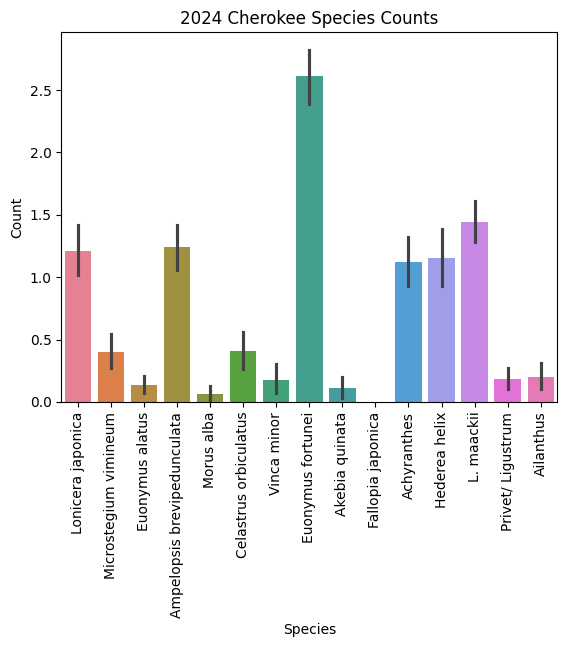

In [ ]:
sns.barplot(cherokee2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2024 Cherokee Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')


<ipython-input-37-fd8c839c370b>:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(cherokee2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

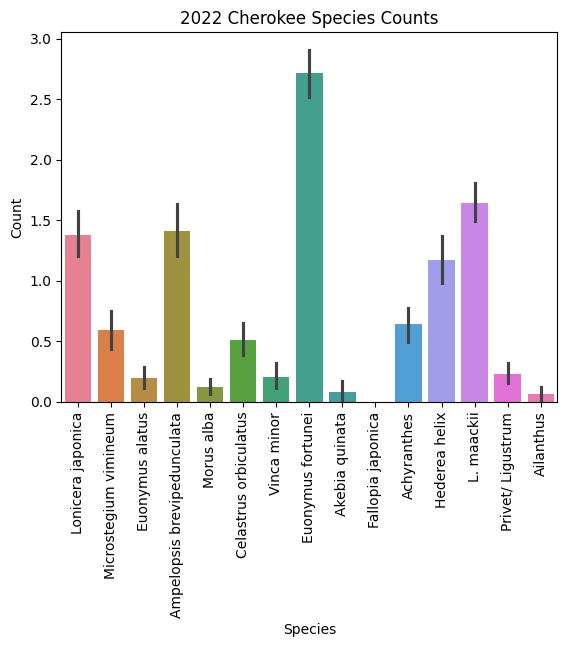

In [ ]:
sns.barplot(cherokee2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2022 Cherokee Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')

<ipython-input-38-fdfd02a745b9>:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(seneca2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

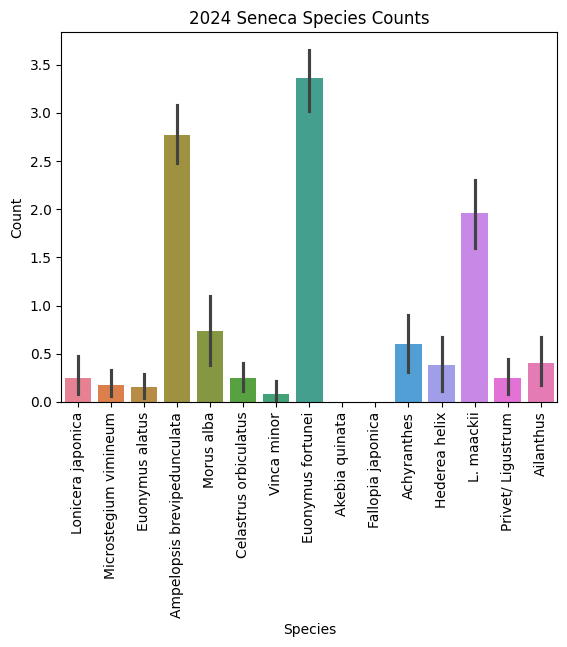

In [ ]:
sns.barplot(seneca2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2024 Seneca Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')

<ipython-input-39-ba13a66daa87>:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(seneca2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

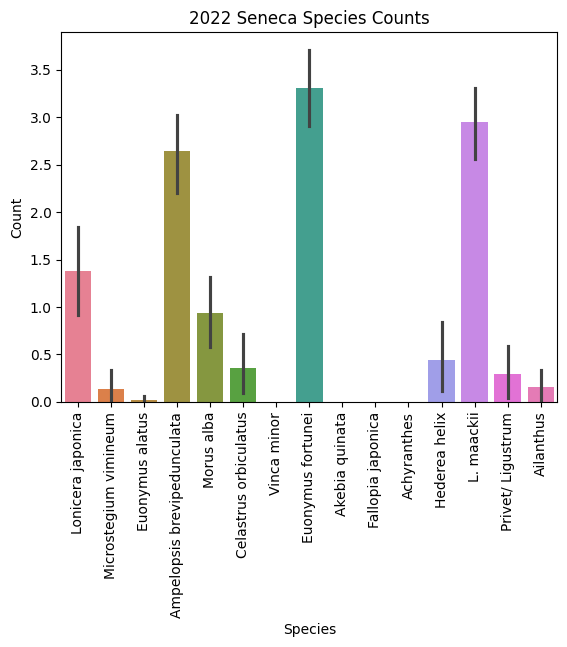

In [ ]:
sns.barplot(seneca2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2022 Seneca Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')

# Barplot Observations about Parks


Euonymus fortunei, aka wintercreeper, is by far the most present invasive species in both Seneca and Cheorkee park.


<br>

## Cheorkee:
- There was a noticable increase in Achyranthes from 2022 to 2024. This may indicate Achyranthes is a species that might need managment in the future.
- Species Dominance: In both 2022 and 2024, Euonymus fortunei and Lonicera japonica show consistently high counts, suggesting they are prominent in Cherokee Park across both years.
- Changes Over Time: There appears to be an increase in Ampelopsis brevipedunculata from 2022 to 2024, which may indicate its spread or improved survival conditions.
- Potential Invasive Impact: The consistent presence and slight growth in numbers of Lonicera japonica (Japanese honeysuckle) and Euonymus fortunei (Wintercreeper) raise potential concerns, as these species are known to be invasive, possibly impacting native species diversity.

## Seneca:
- From 2022 to 2024 we see a significant decrease in Lonicera Japonica across the park.
- L. maackii has been significantly reduced between 2022 and 2024
- Species with High Counts: Similar to Cherokee, Euonymus fortunei and Ampelopsis brevipedunculata show high counts in both 2022 and 2024, with Vinca minor also prevalent.
- Notable Changes: Hedera helix (English Ivy) and Lonicera japonica seem to show a reduction in 2024 compared to 2022. This could be due to management efforts, environmental factors, or interspecies competition.
- Invasive Species Management: The presence and changes in counts for invasive species like Hedera helix and Lonicera japonica between 2022 and 2024 suggest an area to monitor for invasive species management and impact on park biodiversity.

## Overall Observations
- Consistent Dominant Species: Across both Cherokee and Seneca Parks, Euonymus fortunei remains one of the highest-count species, indicating its strong presence and potential invasive spread.
- Inter-Year Comparison: Comparing counts over time for each species reveals trends that could be due to seasonal changes, ecological shifts, or park management efforts. For instance, the increase in Ampelopsis brevipedunculata suggests it may be adapting well or facing limited competition.
- Potential Invasive Spread: The prevalence of multiple known invasive species (Euonymus fortunei, Lonicera japonica, Hedera helix) across years and parks highlights the need for continued monitoring and potentially active management to control their impact on native flora.

Text(0.5, 1.0, '2024 Measurment Correlations')

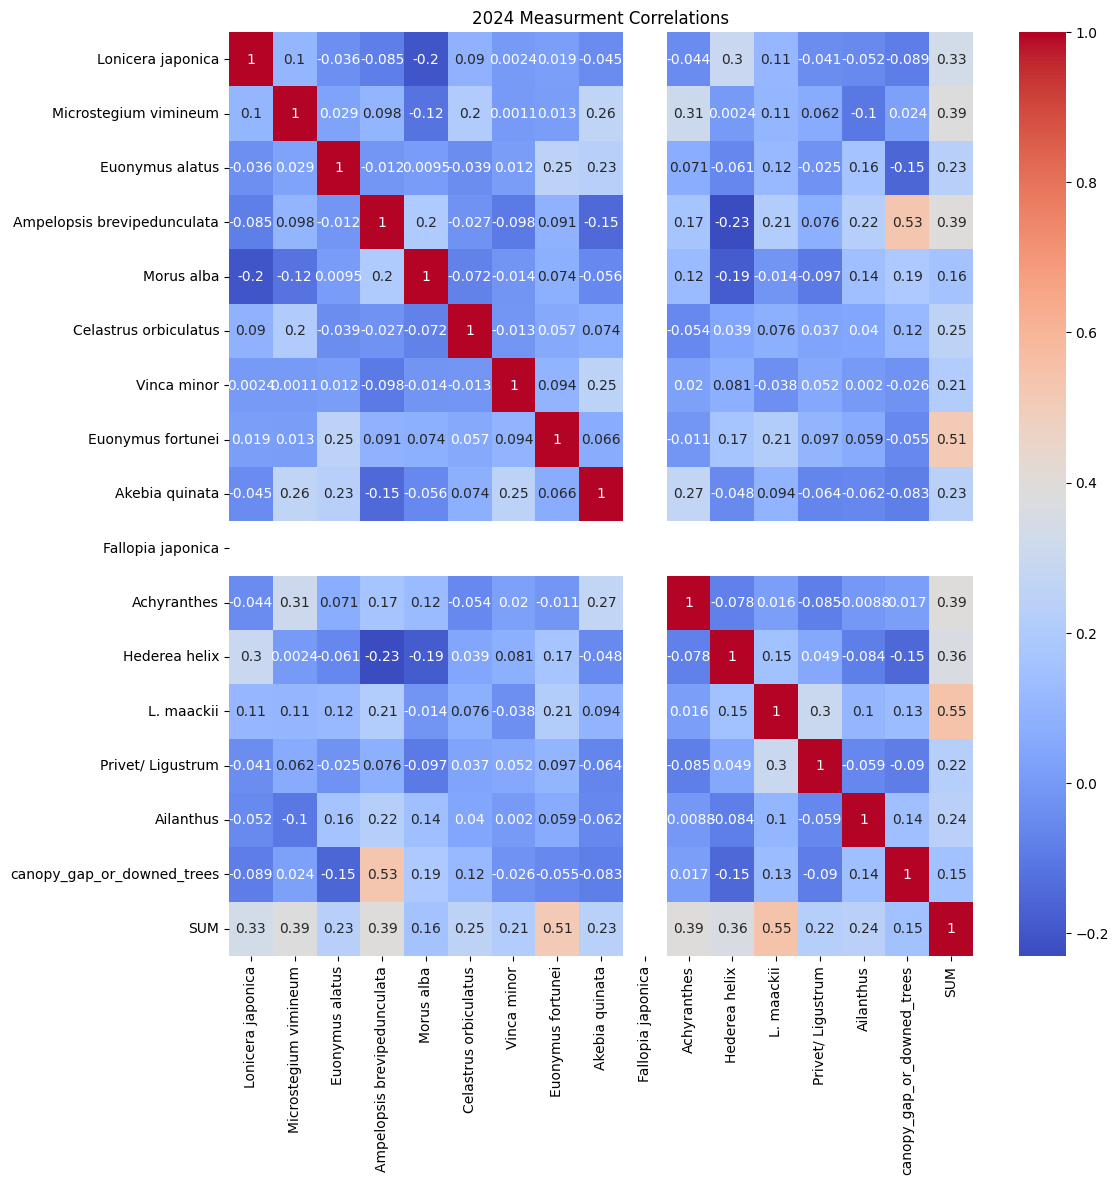

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(senakee2024[measurement_cols].dropna().corr(), annot=True, cmap='coolwarm')
plt.title('2024 Measurment Correlations')

Text(0.5, 1.0, '2022 Measurment Correlations')

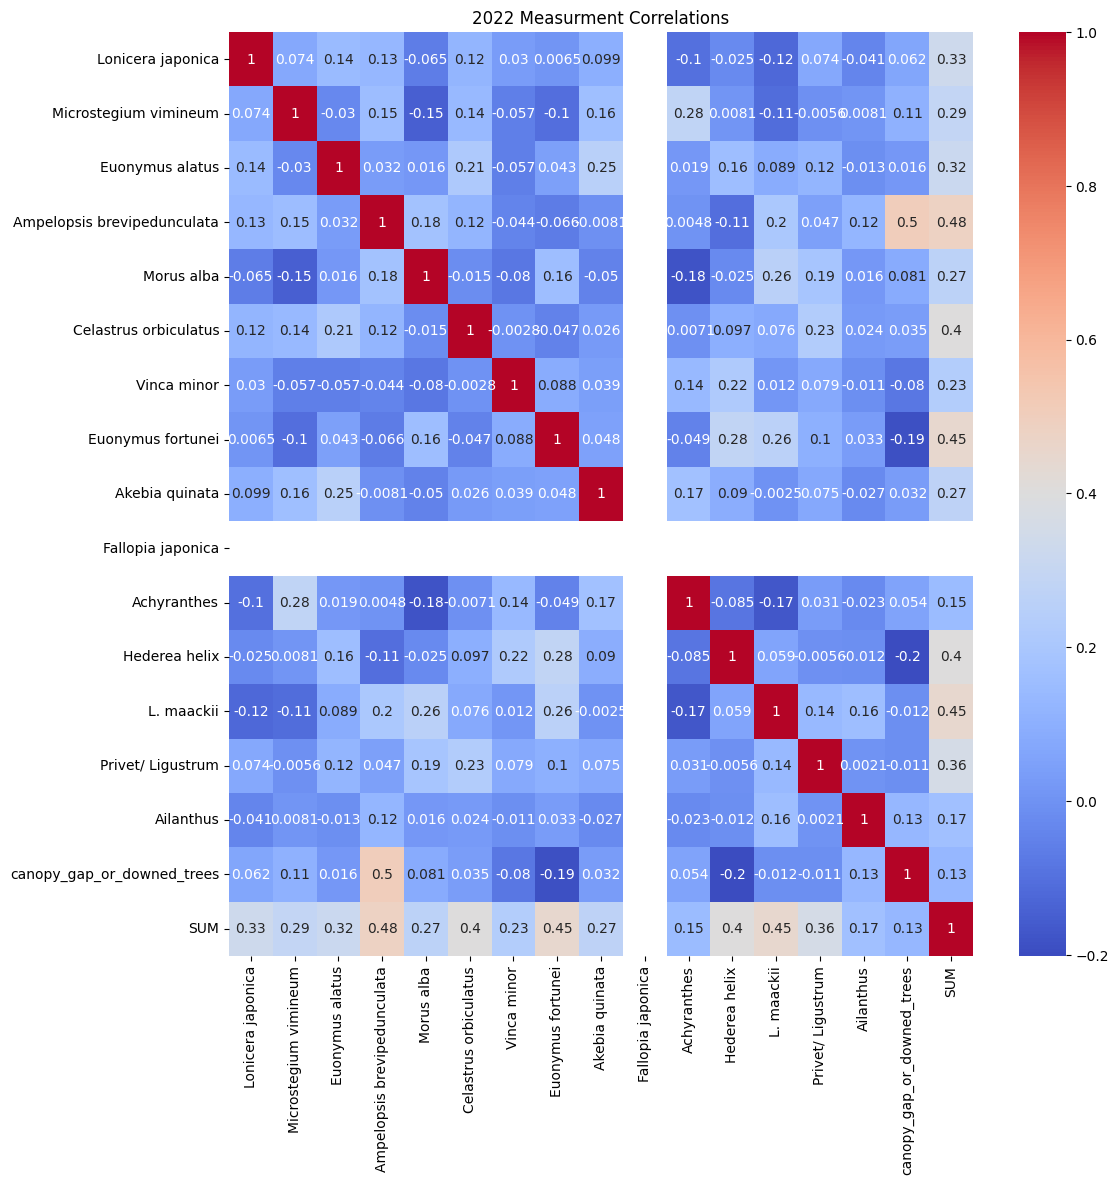

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(senakee2022[measurement_cols].dropna().corr(), annot=True, cmap='coolwarm')
plt.title('2022 Measurment Correlations')

# Heatmap Observations

Most of the measured data has no correlation, but there is a 0.5 correlation between Ampelopsis brevipedunculata and canopy gap / downed trees. This may indicate that the presence of a large canopy gap or a lot of down trees allows Ampelopsis brevipedunculata to grow. It could also mean Ampelopsis brevipedunculata is causeing an increased canopy gap and downed trees.

<br>

Further study could calrify whether this correlation is causative, especially where Ampelopsis Brevipedunculata is prevalent

<br>

- The heatmap displays the correlation values between various species and environmental factors. Most species show low or negligible correlations, indicating that the presence of one species does not strongly predict or influence the presence of another in most cases.

<br>

- Ampelopsis brevipedunculata shows a moderate positive correlation (0.5) with canopy gaps or downed trees. This may imply that Ampelopsis brevipedunculata either thrives in areas with more canopy openings or contributes to increased canopy gaps, possibly through competitive interactions or physical impact on nearby trees.

- Celastrus orbiculatus has a moderate correlation of 0.4 with SUM, indicating that areas with higher total species counts or coverage may have a slightly higher presence of this species.

<br>

- L. maackii shows slight negative correlations with several species and environmental factors, such as a -0.19 correlation with Euonymus fortunei and -0.18 with canopy gaps or downed trees. This suggests that L. maackii may not coexist strongly with certain other species or may have specific habitat preferences that differ from those with canopy gaps.

- Most other correlations are near zero, indicating a general lack of association between many species in this environment, reinforcing the idea of independence among their distributions.

<br>

- The correlation between Ampelopsis brevipedunculata and canopy gaps suggests an area for further study, as this species may be influencing or responding to changes in canopy structure.

- Low correlations among most species imply a diverse ecosystem where species distributions are relatively independent, potentially due to unique habitat preferences or varying levels of competition.

<br>

## Conclusion

- This heatmap reveals that while most species show low interdependencies, specific relationships, such as those between Ampelopsis brevipedunculata and canopy gaps, could provide insight into species that significantly impact their environment. Continued monitoring of these correlations over time could reveal patterns that inform management strategies, particularly for invasive species and habitat maintenance.


# Violin Plot

The following plot shoes the relative clustering of coverage grades for each species. A thinker portion on the curve indicates a lot of data elements at that y value.

Practicially, its ideal for the distributions to be closer to 0.

<ipython-input-46-21ef790ad128>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.violinplot(data=cherokee2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Coverage Grade (0 to 4)')

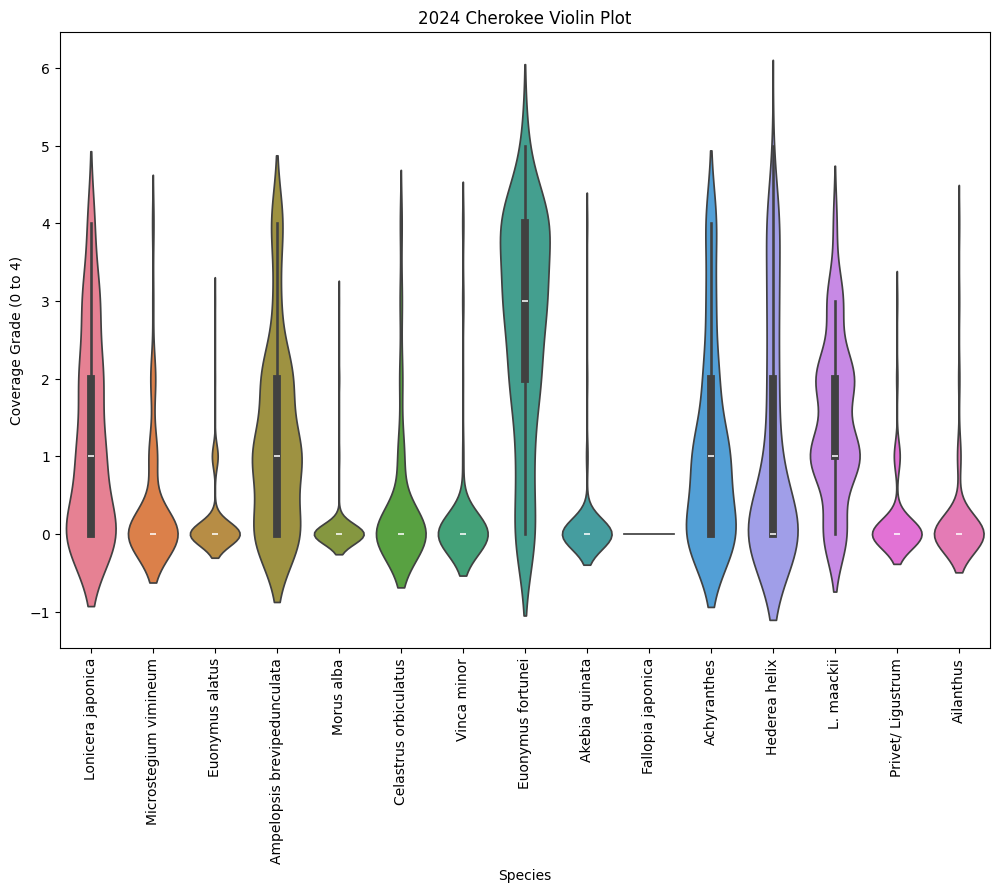

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=cherokee2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2024 Cherokee Violin Plot')
plt.xlabel('Species')
plt.ylabel('Coverage Grade (0 to 4)')

<ipython-input-47-16547947fc56>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.violinplot(data=cherokee2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Coverage Grade (0 to 4)')

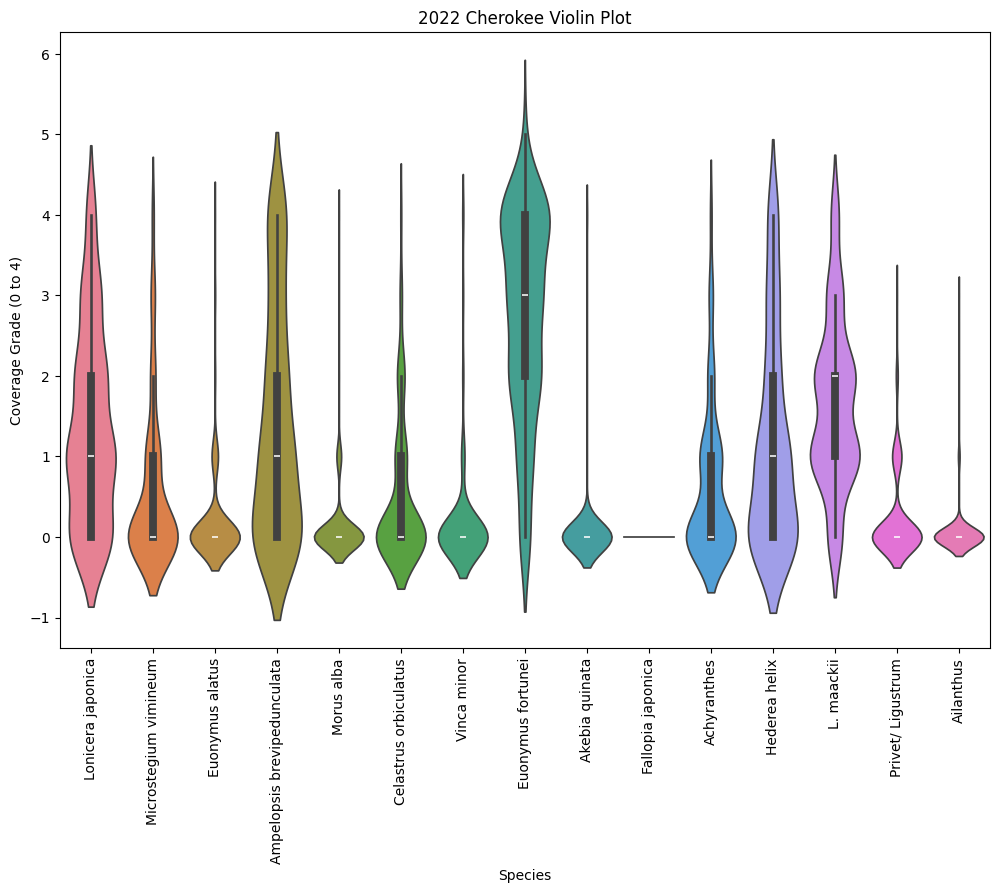

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=cherokee2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2022 Cherokee Violin Plot')
plt.xlabel('Species')
plt.ylabel('Coverage Grade (0 to 4)')

<ipython-input-48-2294db93828f>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.violinplot(data=seneca2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Coverage Grade (0 to 4)')

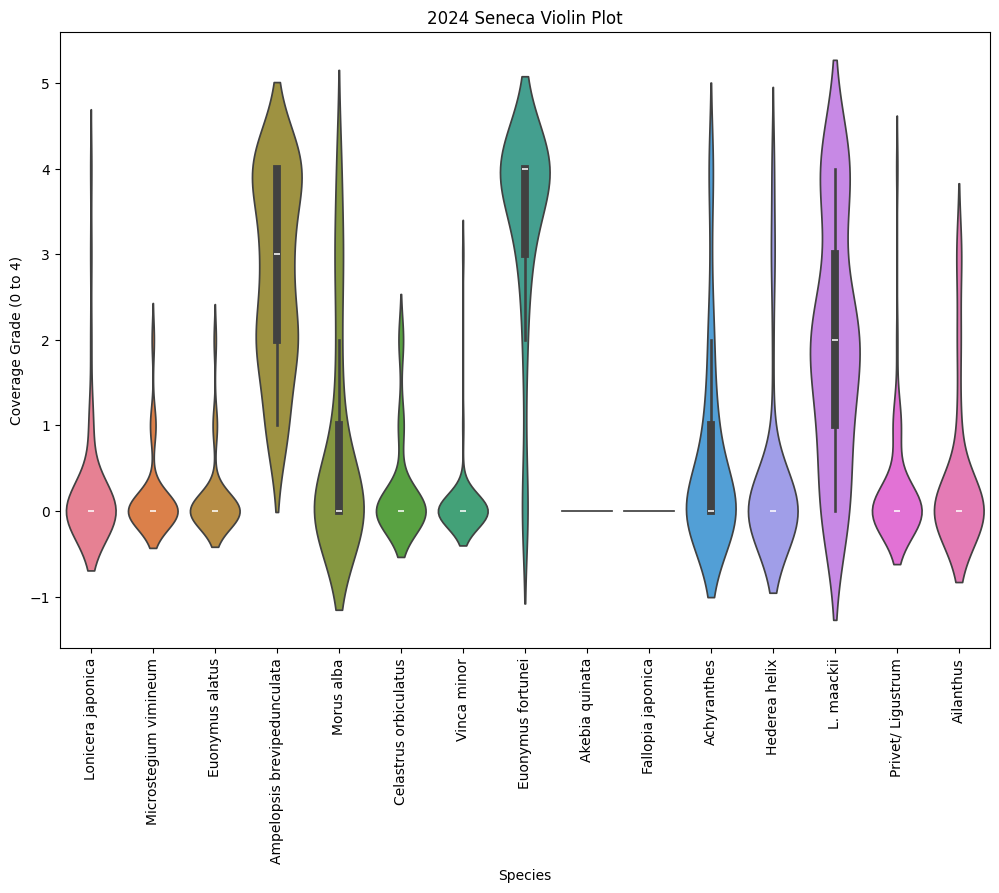

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=seneca2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2024 Seneca Violin Plot')
plt.xlabel('Species')
plt.ylabel('Coverage Grade (0 to 4)')

<ipython-input-49-e75b0e2d072e>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.violinplot(data=seneca2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Coverage Grade (0 to 4)')

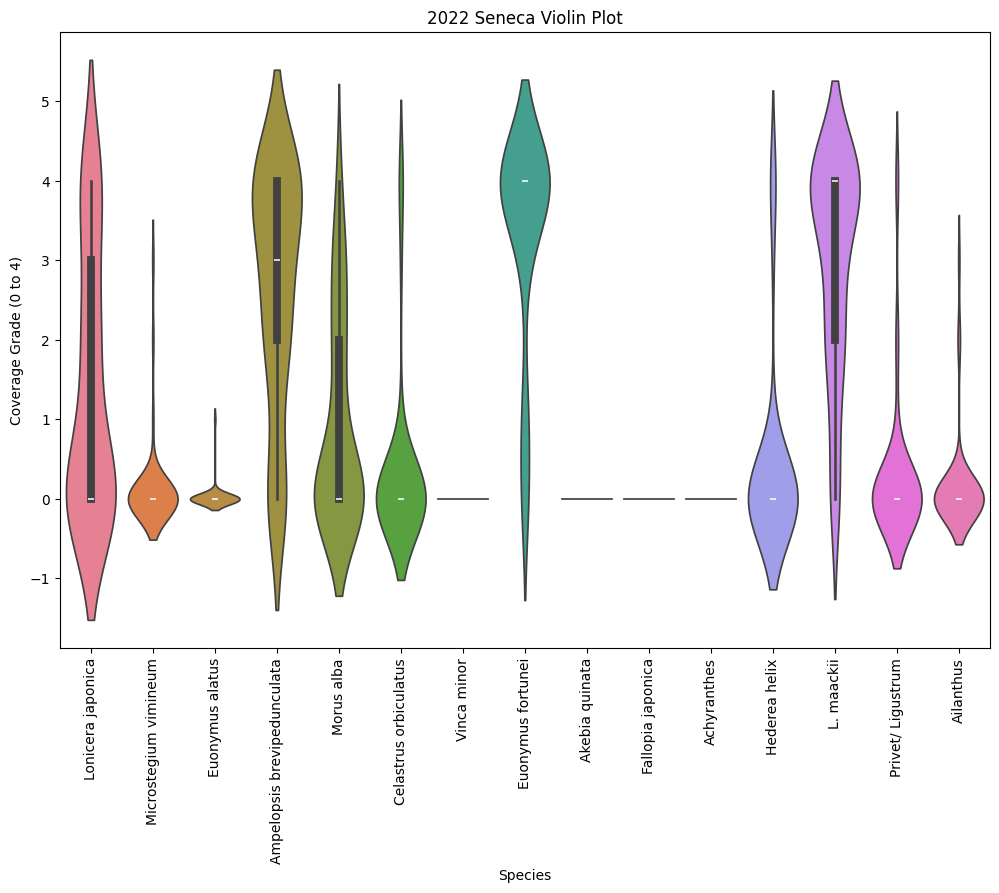

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=seneca2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2022 Seneca Violin Plot')
plt.xlabel('Species')
plt.ylabel('Coverage Grade (0 to 4)')

## Violin Plot Observations

L Maackii is relatively evenly distributed among the 4 grading points. This means the both Cherokee and Seneca experience all varieties of growth for L. Maackii: there are both sites with max coverage and little coverage.

Euonymus Fortunei is distributed mostly in the 3 to 4 range for both Cherokee and Seneca. This indicates that if a site has Euonymus Fortunei, it is most likely well developed. This may be because of the rate and ease of coverage Euonymus Fortunei has.

On a good note, most of the other invasive species are distributed mostly into the 0 to 1 range of the grading scale. This means that in sites where one of these given species exists, it is a relatively minor case.

# Scatterplots

<ipython-input-50-9da93b296cf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cherokee2022.loc[:, 'sums'] = cherokee2022[species_cols].sum(axis=1)
<ipython-input-50-9da93b296cf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cherokee2024.loc[:, 'sums'] = cherokee2024[species_cols].sum(axis=1)
<ipython-input-50-9da93b296cf9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

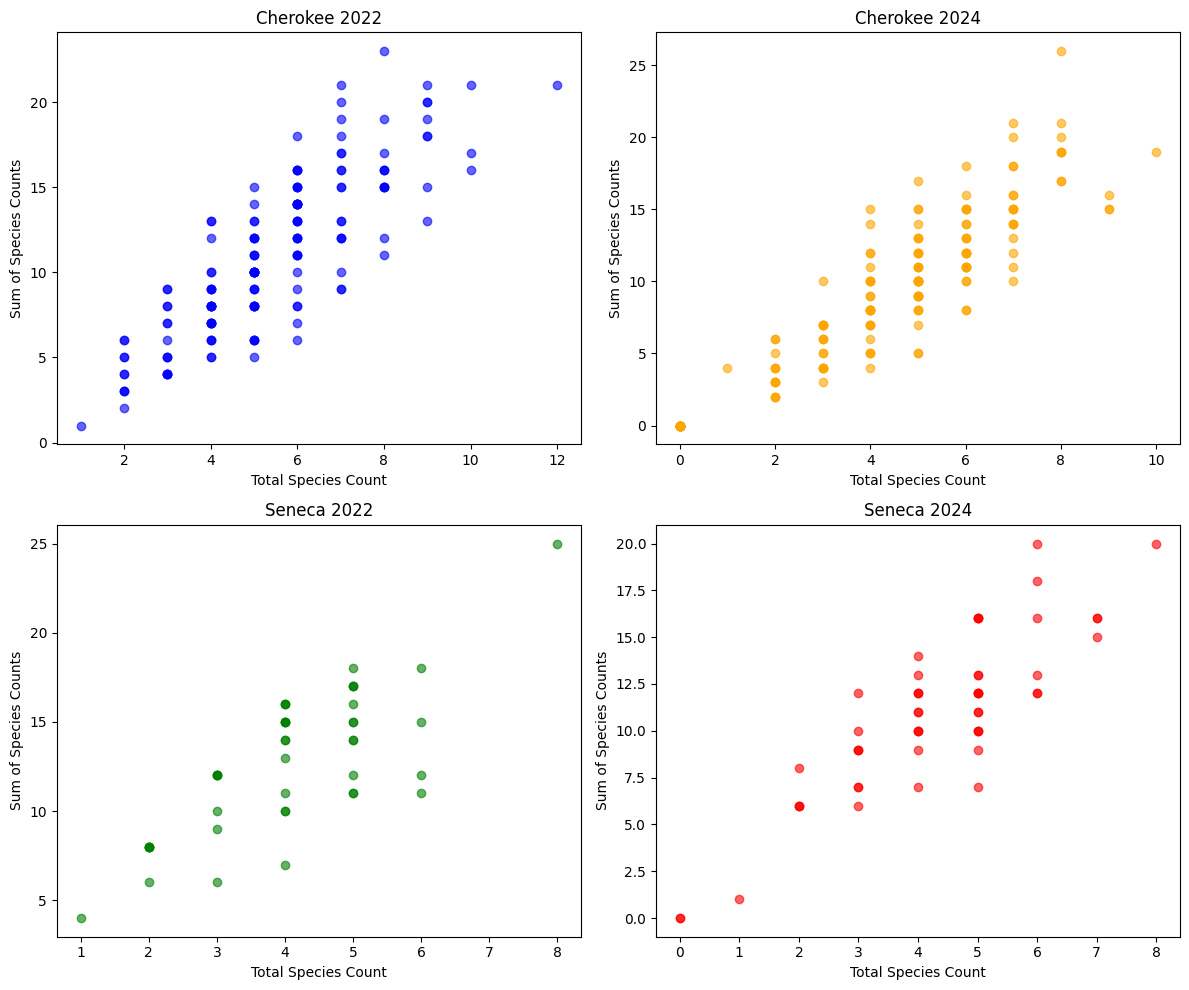

In [ ]:
# Calculate the 'sums' column for each dataframe, using .loc[] to avoid warnings
cherokee2022.loc[:, 'sums'] = cherokee2022[species_cols].sum(axis=1)
cherokee2024.loc[:, 'sums'] = cherokee2024[species_cols].sum(axis=1)
seneca2022.loc[:, 'sums'] = seneca2022[species_cols].sum(axis=1)
seneca2024.loc[:, 'sums'] = seneca2024[species_cols].sum(axis=1)

# Calculate 'total_species_count' based on the number of non-zero species
cherokee2022.loc[:, 'total_species_count'] = (cherokee2022[species_cols] > 0).sum(axis=1)
cherokee2024.loc[:, 'total_species_count'] = (cherokee2024[species_cols] > 0).sum(axis=1)
seneca2022.loc[:, 'total_species_count'] = (seneca2022[species_cols] > 0).sum(axis=1)
seneca2024.loc[:, 'total_species_count'] = (seneca2024[species_cols] > 0).sum(axis=1)

# Plot scatterplots for each subset using 'sums' as y and 'total_species_count' as x
plt.figure(figsize=(12, 10))

# Cherokee 2022
plt.subplot(2, 2, 1)
plt.scatter(cherokee2022['total_species_count'], cherokee2022['sums'], color='blue', alpha=0.6)
plt.title('Cherokee 2022')
plt.xlabel('Total Species Count')
plt.ylabel('Sum of Species Counts')

# Cherokee 2024
plt.subplot(2, 2, 2)
plt.scatter(cherokee2024['total_species_count'], cherokee2024['sums'], color='orange', alpha=0.6)
plt.title('Cherokee 2024')
plt.xlabel('Total Species Count')
plt.ylabel('Sum of Species Counts')

# Seneca 2022
plt.subplot(2, 2, 3)
plt.scatter(seneca2022['total_species_count'], seneca2022['sums'], color='green', alpha=0.6)
plt.title('Seneca 2022')
plt.xlabel('Total Species Count')
plt.ylabel('Sum of Species Counts')

# Seneca 2024
plt.subplot(2, 2, 4)
plt.scatter(seneca2024['total_species_count'], seneca2024['sums'], color='red', alpha=0.6)
plt.title('Seneca 2024')
plt.xlabel('Total Species Count')
plt.ylabel('Sum of Species Counts')

plt.tight_layout()
plt.show()


# Scatterplot Observations

This scatterplot matrix provides insights into the relationship between species diversity (total species count) and overall species abundance (sum of species counts) across different years and parks.

<br>

## Cherokee Park (2022 and 2024):

- Positive Relationship: Both 2022 and 2024 in Cherokee Park show a clear upward trend—observations with higher total species count tend to have higher sums of species counts.

- Higher Diversity and Abundance: Cherokee 2022 shows points reaching up to 12 different species per observation, whereas Cherokee 2024 maxes out around 10. This suggests a slight reduction in diversity by 2024, though the overall abundance (up to ~25 for some observations) is still high.

- Possible Ecological Stability: The strong relationship suggests that areas with more diverse species have higher overall abundance, potentially indicating stable ecological conditions that support both diversity and abundance in Cherokee Park.

<br>

## Seneca Park (2022 and 2024):

- Lower Diversity and Abundance: Seneca Park shows lower maximum values for both total species count (around 7-8) and sum of species counts (around 20). This could imply that Seneca Park supports fewer species or has a different environment compared to Cherokee Park.

- Weaker Trend in 2022: The points in Seneca 2022 are more scattered, showing a weaker positive trend compared to Cherokee Park, indicating variability in species abundance at similar levels of species diversity.

- Tightening in 2024: Seneca 2024 shows a clearer upward trend, suggesting that by 2024, the relationship between diversity and abundance might be stabilizing, potentially due to environmental changes or management practices.

<br>

## Observation
- Environmental or Management Factors: The increase in structure from 2022 to 2024 in both parks, especially in Seneca, might suggest changes in management or environmental factors influencing species distribution and abundance.

- Cherokee vs. Seneca Differences: Cherokee Park consistently supports higher diversity and abundance than Seneca Park, which might be due to differences in habitat quality, soil, light, or human impact.

- Stable Ecosystem: In Cherokee Park, higher species diversity is strongly linked to higher abundance, which may point to a balanced ecosystem that supports both diversity and richness.

- Potential Changes in Seneca Park: Seneca Park’s scatterplots suggest it may have experienced changes from 2022 to 2024, moving towards a more consistent relationship between diversity and abundance. Monitoring this could help understand environmental influences or the impact of interventions in Seneca.

<br>

# Conclusion

This analysis provides insights into the distribution and interactions of various plant species in Cherokee and Seneca Parks from 2022 to 2024. Key findings include the prevalence and potential impact of invasive species, observed correlations with environmental factors, and the independence of many species distributions.

## Species Distribution

- Across both parks, certain invasive species, such as Euonymus fortunei, Lonicera japonica, and Ampelopsis brevipedunculata, show consistently high counts. These species are known for their aggressive growth patterns and ability to dominate ecosystems, raising concerns for native biodiversity. Monitoring their spread over time is essential to inform management strategies.

## Ecological Interactions

- The heatmap analysis reveals a moderate positive correlation between Ampelopsis brevipedunculata and canopy gaps/downed trees, suggesting a complex relationship where this species may either benefit from or contribute to canopy disturbances. This finding highlights Ampelopsis brevipedunculata as a key species of interest for understanding ecosystem dynamics related to canopy health and gaps.

- Other correlations were generally low, indicating that species distributions are mostly independent. This could suggest that the environment supports a variety of niches, allowing diverse species to coexist without significant interdependence or competition.

## Implications for Park Management

- The persistent presence of invasive species, coupled with specific correlations between species and environmental factors, suggests areas for targeted intervention. For instance, managing canopy gaps might limit the spread of Ampelopsis brevipedunculata if it is found to thrive in these conditions.

- Regular monitoring of these patterns is recommended, as continued changes over time could signal shifts in ecosystem balance. Implementing control measures for invasive species, while supporting native plants, could foster a more resilient and diverse habitat in both parks.

## Future Direction

- Further studies could explore causative relationships, particularly regarding Ampelopsis brevipedunculata and canopy gaps. Experimental studies or longer-term monitoring could clarify whether this species directly influences canopy health or simply occupies disturbed areas.

- Additional environmental factors, such as soil type, moisture levels, and light exposure, could provide deeper insights into the habitat preferences and competitive advantages of both invasive and native species.

<br>

In conclusion, while Cherokee and Seneca Parks support a rich diversity of plant species, the influence of invasive species and specific environmental correlations highlight the need for active management. By continuing to track these patterns and addressing invasive species' impact, these parks can maintain healthy, balanced ecosystems that benefit native flora and local biodiversity.

# Associative Rule Analysis



## Cherokee 2024


In [ ]:
# import libraries for associative rule
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# create a copy to manipulate for association rule learning
dfcopy = cherokee2024.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# stip the "Cherokee" part off of the comment to leave only the number of the station
# this number will act as our transaction number
dfcopy['Comment'] = dfcopy['Comment'].str[8:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.rename(columns={'Comment': 'Transaction'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM,sums,total_species_count
0,1,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,2.0,0.0,3.0,0.0,...,0.0,1.0,3.0,3.0,0.0,0.0,2.0,20,20.0,8
1,2,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,15,15.0,7


In [ ]:
invasive_cols = ["Lonicera japonica","Microstegium vimineum","Euonymus alatus",
                 "Ampelopsis brevipedunculata","Morus alba","Celastrus orbiculatus",
                 "Vinca minor","Euonymus fortunei","Akebia quinata",
                 "Fallopia japonica","Achyranthes","Hederea helix",
                 "L. maackii","Privet/ Ligustrum","Ailanthus" ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# remove everything except transaction, canopy, understory, and invasie species columns
dfcopy = dfcopy[["Transaction", "Canopy", "Understory"] + invasive_cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,1,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,2.0,0.0,3.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0
1,2,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0


In [ ]:
# for columns in invasive_cols if the value is greater than 0 make it 1 else 0
# seperate the encoded invasive values into a separate dataframe for now
df_invasive = dfcopy[invasive_cols].copy().applymap(lambda x: 1 if x > 3 else 0)

dfcopy[["Transaction", "Canopy", "Understory"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-93-bf83ab207314>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_invasive = dfcopy[invasive_cols].copy().applymap(lambda x: 1 if x > 3 else 0)


,Transaction,Canopy,Understory
0,1,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry"
1,2,"Cherry, hackberry, maple","Maple, buckeye, locust"
2,3,"Oak, basswood, maple","Maple, ash"
3,4,"Locust, walnut, sycamore","Ash, hackberry, boxelder"
4,5,"Oak, maple, locust","Ash, hackberry, viburnum"
...,...,...,...
168,169,"Hackberry, walnut, basswood","Redbud, box elder, serviceberry, pawpaw"
169,170,"Willow oak, chestnut oak, elm, hickory, maple,...","Redbud, cedar, ash,"
170,171,"Oaks: chestnut, red, white, maple, walnut, hac...","Maple, redbud, ash, cedar,"
171,172,"Chestnut oaks, hickory, walnut, maple, red oak,","Redbud, ash, hickory, hackberry,"


In [ ]:
df_invasive.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# if an element has value 1 append the column name to a string for that row, if there are multiple 1's in a row, separate the columns by a comma
df_invasive['Invasive'] = df_invasive.apply(lambda row: ','.join([col for col in invasive_cols if row[col] == 1]), axis=1)
df_invasive = df_invasive[['Invasive']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_invasive.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invasive
0,Celastrus orbiculatus
1,"Lonicera japonica,Euonymus fortunei"
2,
3,"Ampelopsis brevipedunculata,Euonymus fortunei,..."
4,Euonymus fortunei


In [ ]:
# split values in canopy into array by comma
dfcopy['Canopy'] = dfcopy['Canopy'].str.split(',')
dfcopy['Understory'] = dfcopy['Understory'].str.split(',')
df_invasive["Invasive"] = df_invasive["Invasive"].str.split(',')
# combine canopy, understory, and invasive species into a column names Items
dfcopy['Items'] = dfcopy['Canopy'] + dfcopy['Understory'] + df_invasive['Invasive']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy = dfcopy[["Transaction", "Items"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Items
0,1,"[Walnut, maple, mulberry, locust, Boxelder,..."
1,2,"[Cherry, hackberry, maple, Maple, buckeye, ..."
2,3,"[Oak, basswood, maple, Maple, ash, ]"
3,4,"[Locust, walnut, sycamore, Ash, hackberry, ..."
4,5,"[Oak, maple, locust , Ash, hackberry, vibu..."


In [ ]:
# explode items to get one row per item|
dfexpand = dfcopy.explode("Items")
dfexpand = dfexpand[["Transaction", "Items"]]
dfexpand.drop_duplicates(inplace=True)
dfexpand.dropna(inplace=True)
dfexpand = dfexpand[dfexpand["Items"] != '']
dfexpand = dfexpand[dfexpand["Items"] != ' ']
dfexpand.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Items
0,1,Walnut
0,1,maple
0,1,mulberry
0,1,locust
0,1,Boxelder
0,1,hackberry
0,1,Celastrus orbiculatus
1,2,Cherry
1,2,hackberry
1,2,maple


In [ ]:
basket = pd.crosstab(dfexpand['Transaction'], dfexpand['Items'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# generate basket where items are encoded as a 1 or 0 for in transaction or not in transation respectively
basket.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Items,,Carpinus?,Holly,Osage orange?,Spicebush,acre negundo,aralia,ash,ash,bass wood,...,Tree of heaven,Tulip poplar,Vinca minor,Walnut,Willow oak,Yellowwood,ash,boxelder,cherry,hackberry
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.319728,( ash)
1,0.108844,( basswood)
2,0.102041,( beech)
3,0.068027,( box elder)
4,0.081633,( boxelder)
...,...,...
90,0.061224,"(Euonymus fortunei, ash, maple)"
91,0.068027,"(Euonymus fortunei, hackberry, maple)"
92,0.054422,"( hackberry, walnut, Euonymus fortunei)"
93,0.068027,"( hackberry, Maple, Euonymus fortunei)"


In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7, num_itemsets=1)
pd.DataFrame(rules[["antecedents", "consequents", "support", "confidence", "lift"]]).head(30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,( basswood),( maple),0.081633,0.750000,1.470000
1,(Beech),( maple),0.054422,0.800000,1.568000
2,(Oak),( maple),0.074830,0.733333,1.437333
3,(Tulip poplar),( maple),0.088435,0.812500,1.592500
4,"( ash, Maple)",( hackberry),0.054422,0.727273,1.724340
5,"(Hederea helix, Euonymus fortunei)",(Maple),0.054422,0.800000,2.800000


## Cherokee 2022

In [ ]:
dfcopy = cherokee2022.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy['Comment'] = dfcopy['Comment'].str[8:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM,sums,total_species_count
0,1,40.30,59.70,"Cherry, sassafras, maple, hackberry, walnutash","Box elder, sugar maple saplings",2,1,0,3,1,...,0,0,1,3,0.0,0.0,1.0,16,16.0,8
1,2,5.20,94.80,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder,",1,0,0,0,0,...,0,0,2,1,0.0,0.0,0.0,8,8.0,4
2,3,11.96,88.04,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",1,0,0,0,0,...,0,0,2,1,0.0,0.0,0.0,8,8.0,4
3,4,5.20,94.80,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",1,0,0,3,0,...,0,0,3,3,0.0,0.0,0.0,13,13.0,5
4,5,26.00,74.00,Basswood locust red oak ash?,Buckeye Spicebush ash sapling,3,0,0,3,0,...,0,1,1,3,0.0,0.0,0.0,15,15.0,7


In [ ]:
invasive_cols = ["Lonicera japonica","Microstegium vimineum","Euonymus alatus",
                 "Ampelopsis brevipedunculata","Morus alba","Celastrus orbiculatus",
                 "Vinca minor","Euonymus fortunei","Akebia quinata",
                 "Fallopia japonica","Achyranthes","Hederea helix",
                 "L. maackii","Privet/ Ligustrum","Ailanthus" ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.rename(columns={'Comment': 'Transaction'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy = dfcopy[["Transaction", "Canopy", "Understory"] + invasive_cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,1,"Cherry, sassafras, maple, hackberry, walnutash","Box elder, sugar maple saplings",2,1,0,3,1,2,0,3,0,0,0,1,3,0.0,0.0
1,2,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder,",1,0,0,0,0,0,0,4,0,0,0,2,1,0.0,0.0
2,3,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",1,0,0,0,0,0,0,4,0,0,0,2,1,0.0,0.0
3,4,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",1,0,0,3,0,0,0,3,0,0,0,3,3,0.0,0.0
4,5,Basswood locust red oak ash?,Buckeye Spicebush ash sapling,3,0,0,3,0,0,1,3,0,0,1,1,3,0.0,0.0


In [ ]:
# for columns in invasive_cols if the value is greater than 0 make it 1 else 0
df_invasive = dfcopy[invasive_cols].copy().applymap(lambda x: 1 if x > 3 else 0)
dfcopy[["Transaction", "Canopy", "Understory"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-54-daf3b6078cce>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_invasive = dfcopy[invasive_cols].copy().applymap(lambda x: 1 if x > 3 else 0)


,Transaction,Canopy,Understory
0,1,"Cherry, sassafras, maple, hackberry, walnutash","Box elder, sugar maple saplings"
1,2,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder,"
2,3,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye"
3,4,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings"
4,5,Basswood locust red oak ash?,Buckeye Spicebush ash sapling
...,...,...,...
159,169,"Ash, oak, bitternut hickory, sugar maple, buck...","Buckeye, cercis, black cherry, dogwood, junipe..."
160,170,"Osage Orange, chinkapin oak, ash, tilia, sugar...","Hackberry, cercis, ash, oak, maple, juniper, elm"
161,171,"Oak sp, ash, sycamore","Sugar maple, ash, juniper, cercis, butternut h..."
162,172,"Ailanthus, cercis, buckeye, sugar maple, Cornu...","Bladdernut, juniper, lonicera, ash"


In [ ]:
df_invasive.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# if an element has value 1 append the column name to a string for that row, if there are multiple 1's in a row, separate the columns by a comma
df_invasive['Invasive'] = df_invasive.apply(lambda row: ','.join([col for col in invasive_cols if row[col] == 1]), axis=1)
df_invasive = df_invasive[['Invasive']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_invasive.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invasive
0,
1,Euonymus fortunei
2,Euonymus fortunei
3,
4,


In [ ]:
dfcopy["Canopy"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Canopy
0,"Cherry, sassafras, maple, hackberry, walnutash"
1,"Cherry, black locust, ash, sugar maple, tulip ..."
2,"Tilia basswood, n red oak, maple, pin oak, hic..."
3,"Elm, cottonwood, walnut, sycamore, ironwood"
4,Basswood locust red oak ash?
...,...
159,"Ash, oak, bitternut hickory, sugar maple, buck..."
160,"Osage Orange, chinkapin oak, ash, tilia, sugar..."
161,"Oak sp, ash, sycamore"
162,"Ailanthus, cercis, buckeye, sugar maple, Cornu..."


In [ ]:
# split values in canopy into array by comma
dfcopy['Canopy'] = dfcopy['Canopy'].str.split(',')
dfcopy['Understory'] = dfcopy['Understory'].str.split(',')
df_invasive["Invasive"] = df_invasive["Invasive"].str.split(',')
dfcopy['Items'] = dfcopy['Canopy'] + dfcopy['Understory'] + df_invasive['Invasive']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-59-c4c097bff84d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invasive["Invasive"] = df_invasive["Invasive"].str.split(',')


In [ ]:
dfcopy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Items
0,1,"[Cherry, sassafras, maple, hackberry, waln...","[Box elder, sugar maple saplings]",2,1,0,3,1,2,0,3,0,0,0,1,3,0.0,0.0,"[Cherry, sassafras, maple, hackberry, waln..."
1,2,"[Cherry, black locust, ash, sugar maple, t...","[Sugar maple, ash, redbud, box elder, ]",1,0,0,0,0,0,0,4,0,0,0,2,1,0.0,0.0,"[Cherry, black locust, ash, sugar maple, t..."
2,3,"[Tilia basswood, n red oak, maple, pin oak,...","[Holly, maple saplings, ash saplings, buckeye]",1,0,0,0,0,0,0,4,0,0,0,2,1,0.0,0.0,"[Tilia basswood, n red oak, maple, pin oak,..."
3,4,"[Elm, cottonwood, walnut, sycamore, ironwood]","[Box elder, redbud, ash saplings ]",1,0,0,3,0,0,0,3,0,0,0,3,3,0.0,0.0,"[Elm, cottonwood, walnut, sycamore, ironwo..."
4,5,[Basswood locust red oak ash? ],[Buckeye Spicebush ash sapling ],3,0,0,3,0,0,1,3,0,0,1,1,3,0.0,0.0,"[Basswood locust red oak ash? , Buckeye Spiceb..."


In [ ]:
dfexpand = dfcopy.explode("Items")
dfexpand = dfexpand[["Transaction", "Items"]]
dfexpand.drop_duplicates(inplace=True)
dfexpand.dropna(inplace=True)
dfexpand = dfexpand[dfexpand["Items"] != '']
dfexpand = dfexpand[dfexpand["Items"] != ' ']
dfexpand.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Items
0,1,Cherry
0,1,sassafras
0,1,maple
0,1,hackberry
0,1,walnutash
0,1,Box elder
0,1,sugar maple saplings
1,2,Cherry
1,2,black locust
1,2,ash


In [ ]:
basket = pd.crosstab(dfexpand['Transaction'], dfexpand['Items'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Items,,sycamore,viburnum,walnut,Buckeyes hickory maple saplings pawpaw,Carya,Cornus,Maple hackberry mulberry locust,Osage Orange,Spicebush,...,White? Oak,White? Oak hackberry hickory,Yellow wood,box elder,cherry,chinkapin oak,elderberry,maple,prunus sp,sweet gum
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.170732,( ash)
1,0.146341,( box elder)
2,0.060976,( buckeye)
3,0.060976,( cherry)
4,0.201220,( hackberry)
5,0.182927,( maple)
6,0.140244,( sugar maple)
7,0.079268,( sycamore)
8,0.146341,( walnut)
9,0.140244,(Ampelopsis brevipedunculata)


In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7, num_itemsets=3)
pd.DataFrame(rules[["antecedents", "consequents", "support", "confidence", "lift"]]).head(30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,(Hederea helix),(Euonymus fortunei),0.060976,0.714286,1.952381
1,"( ash, Euonymus fortunei)",( sugar maple),0.060976,0.833333,5.942029
2,"( sugar maple, Euonymus fortunei)",( ash),0.060976,0.714286,4.183673


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Seneca 2024

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy = seneca2024.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy['Comment'] = dfcopy['Comment'].str[6:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM,sums,total_species_count
173,1,5.20,94.80,"Cherry, hickory, maple","Hackberry, viburnum, locust",0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,7,7.0,3
174,2,0.26,99.74,"Maple, cherry, ash","Ash,redbud",0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,4.0,2.0,0.0,0.0,0.0,11,11.0,4
175,3,5.20,94.80,"Oak, cherry, hackberry","Redbud, ash",0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,9,9.0,4
176,4,5.72,94.28,"Hackberry, walnut, maple, hackberry","Beautyberry,",1.0,0.0,1.0,2.0,0.0,...,0.0,2.0,0.0,3.0,2.0,0.0,0.0,15,15.0,7
177,5,2.60,97.40,"Hackberry, walnut, maple, hackberry","Buckeye, honeysuckle",0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,0.0,10,10.0,5


In [ ]:
invasive_cols = ["Lonicera japonica","Microstegium vimineum","Euonymus alatus",
                 "Ampelopsis brevipedunculata","Morus alba","Celastrus orbiculatus",
                 "Vinca minor","Euonymus fortunei","Akebia quinata",
                 "Fallopia japonica","Achyranthes","Hederea helix",
                 "L. maackii","Privet/ Ligustrum","Ailanthus" ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.rename(columns={'Comment': 'Transaction'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy = dfcopy[["Transaction", "Canopy", "Understory"] + invasive_cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
173,1,"Cherry, hickory, maple","Hackberry, viburnum, locust",0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
174,2,"Maple, cherry, ash","Ash,redbud",0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0
175,3,"Oak, cherry, hackberry","Redbud, ash",0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
176,4,"Hackberry, walnut, maple, hackberry","Beautyberry,",1.0,0.0,1.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,3.0,2.0,0.0
177,5,"Hackberry, walnut, maple, hackberry","Buckeye, honeysuckle",0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0


In [ ]:
# for columns in invasive_cols if the value is greater than 0 make it 1 else 0
df_invasive = dfcopy[invasive_cols].copy().applymap(lambda x: 1 if x > 3 else 0)
dfcopy[["Transaction", "Canopy", "Understory"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-74-daf3b6078cce>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_invasive = dfcopy[invasive_cols].copy().applymap(lambda x: 1 if x > 3 else 0)


,Transaction,Canopy,Understory
173,1,"Cherry, hickory, maple","Hackberry, viburnum, locust"
174,2,"Maple, cherry, ash","Ash,redbud"
175,3,"Oak, cherry, hackberry","Redbud, ash"
176,4,"Hackberry, walnut, maple, hackberry","Beautyberry,"
177,5,"Hackberry, walnut, maple, hackberry","Buckeye, honeysuckle"
178,6,"Walnut, tulip poplar, elm","Tulip poplar, walnut"
179,7,"Hackberry, tulip poplar","Sweetshrub, oak, Holly, rose of Sharon, hackberry"
180,8,"Cherry, walnut, hackberry","Tulip poplar, mulberry, box elder"
181,9,"Pine, hackberry","Cherry, hackberry"
182,10,"Walnut, mulberry","Redbud, honey locust, oak"


In [ ]:
df_invasive.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
173,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
174,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
175,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
176,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# if an element has value 1 append the column name to a string for that row, if there are multiple 1's in a row, separate the columns by a comma
df_invasive['Invasive'] = df_invasive.apply(lambda row: ','.join([col for col in invasive_cols if row[col] == 1]), axis=1)
df_invasive = df_invasive[['Invasive']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_invasive.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invasive
173,Euonymus fortunei
174,"Euonymus fortunei,Hederea helix"
175,Euonymus fortunei
176,Euonymus fortunei
177,


In [ ]:
dfcopy["Canopy"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Canopy
173,"Cherry, hickory, maple"
174,"Maple, cherry, ash"
175,"Oak, cherry, hackberry"
176,"Hackberry, walnut, maple, hackberry"
177,"Hackberry, walnut, maple, hackberry"
178,"Walnut, tulip poplar, elm"
179,"Hackberry, tulip poplar"
180,"Cherry, walnut, hackberry"
181,"Pine, hackberry"
182,"Walnut, mulberry"


In [ ]:
# split values in canopy into array by comma
dfcopy['Canopy'] = dfcopy['Canopy'].str.split(',')
dfcopy['Understory'] = dfcopy['Understory'].str.split(',')
df_invasive["Invasive"] = df_invasive["Invasive"].str.split(',')
dfcopy['Items'] = dfcopy['Canopy'] + dfcopy['Understory'] + df_invasive['Invasive']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Items
173,1,"[Cherry, hickory, maple]","[Hackberry, viburnum, locust]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,"[Cherry, hickory, maple, Hackberry, viburnu..."
174,2,"[Maple, cherry, ash]","[Ash, redbud]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,"[Maple, cherry, ash, Ash, redbud, Euonymus f..."
175,3,"[Oak, cherry, hackberry ]","[Redbud, ash ]",0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,"[Oak, cherry, hackberry , Redbud, ash , Euo..."
176,4,"[Hackberry, walnut, maple, hackberry]","[Beautyberry, ]",1.0,0.0,1.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,3.0,2.0,0.0,"[Hackberry, walnut, maple, hackberry, Beaut..."
177,5,"[Hackberry, walnut, maple, hackberry]","[Buckeye, honeysuckle]",0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,"[Hackberry, walnut, maple, hackberry, Bucke..."


In [ ]:
dfexpand = dfcopy.explode("Items")
dfexpand = dfexpand[["Transaction", "Items"]]
dfexpand.drop_duplicates(inplace=True)
dfexpand.dropna(inplace=True)
dfexpand = dfexpand[dfexpand["Items"] != '']
dfexpand = dfexpand[dfexpand["Items"] != ' ']
dfexpand.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Items
173,1,Cherry
173,1,hickory
173,1,maple
173,1,Hackberry
173,1,viburnum
173,1,locust
173,1,Euonymus fortunei
174,2,Maple
174,2,cherry
174,2,ash


In [ ]:
basket = pd.crosstab(dfexpand['Transaction'], dfexpand['Items'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Items,Aralia,Holly,Osage orange,Spicebush,ash,ash,box elder,box elder,boxelder,boxelder,...,Sycamore,Tulip poplar,Walnut,White mulberry,Yellowwood,boxelder,hackberry,redbud,spicebush,walnut
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.211538,( cherry)
1,0.403846,( hackberry)
2,0.365385,(Ampelopsis brevipedunculata)
3,0.692308,(Euonymus fortunei)
4,0.307692,(Hackberry)
5,0.230769,(L. maackii)
6,0.346154,(Walnut)
7,0.307692,"(Euonymus fortunei, hackberry)"
8,0.230769,"(Ampelopsis brevipedunculata, Euonymus fortunei)"
9,0.230769,"(Hackberry, Euonymus fortunei)"


In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7, num_itemsets=3)
pd.DataFrame(rules[["antecedents", "consequents", "support", "confidence", "lift"]]).head(30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,( hackberry),(Euonymus fortunei),0.307692,0.761905,1.100529
1,(Hackberry),(Euonymus fortunei),0.230769,0.750000,1.083333
2,(L. maackii),(Euonymus fortunei),0.211538,0.916667,1.324074
3,(Walnut),(Euonymus fortunei),0.307692,0.888889,1.283951


## Seneca 2022

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy = seneca2022.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy['Comment'] = dfcopy['Comment'].str[6:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM,sums,total_species_count
164,1,8.58,91.42,"Cherry, walnut, red oak, hackberry, sugar maple","Box elder, sugar maple, hackberry, ash",0,0,0,1,0,...,0,0,0,4,0.0,0.0,0.0,9,9.0,3
165,2,1.04,98.96,"Walnut, hackberry, cherry, ash","Redbud, ash, mulberry, elderberry",0,0,0,0,3,...,0,0,4,4,0.0,0.0,0.0,15,15.0,4
166,3,8.84,91.16,"Hackberry, red oak, sugar maple","Black locust, ginkgo, ash, redbud",2,0,0,2,0,...,0,0,0,3,0.0,0.0,0.0,11,11.0,4
167,4,3.12,96.88,"Walnut, hackberry, sycamore,","Sugar maple, box elder, hackberry",2,0,0,2,0,...,0,0,0,2,0.0,0.0,0.0,10,10.0,4
168,5,6.76,93.24,"Walnut, hackberry, red mulberry, box elder","Buckeye, box elder",3,0,0,4,0,...,0,0,0,3,1.0,0.0,0.0,15,15.0,5


In [ ]:
invasive_cols = ["Lonicera japonica","Microstegium vimineum","Euonymus alatus",
                 "Ampelopsis brevipedunculata","Morus alba","Celastrus orbiculatus",
                 "Vinca minor","Euonymus fortunei","Akebia quinata",
                 "Fallopia japonica","Achyranthes","Hederea helix",
                 "L. maackii","Privet/ Ligustrum","Ailanthus" ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.rename(columns={'Comment': 'Transaction'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy = dfcopy[["Transaction", "Canopy", "Understory"] + invasive_cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
164,1,"Cherry, walnut, red oak, hackberry, sugar maple","Box elder, sugar maple, hackberry, ash",0,0,0,1,0,0,0,4,0,0,0,0,4,0.0,0.0
165,2,"Walnut, hackberry, cherry, ash","Redbud, ash, mulberry, elderberry",0,0,0,0,3,0,0,4,0,0,0,4,4,0.0,0.0
166,3,"Hackberry, red oak, sugar maple","Black locust, ginkgo, ash, redbud",2,0,0,2,0,0,0,4,0,0,0,0,3,0.0,0.0
167,4,"Walnut, hackberry, sycamore,","Sugar maple, box elder, hackberry",2,0,0,2,0,0,0,4,0,0,0,0,2,0.0,0.0
168,5,"Walnut, hackberry, red mulberry, box elder","Buckeye, box elder",3,0,0,4,0,0,0,4,0,0,0,0,3,1.0,0.0


In [ ]:
# for columns in invasive_cols if the value is greater than 0 make it 1 else 0
df_invasive = dfcopy[invasive_cols].copy().applymap(lambda x: 1 if x > 3 else 0)
dfcopy[["Transaction", "Canopy", "Understory"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-94-daf3b6078cce>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_invasive = dfcopy[invasive_cols].copy().applymap(lambda x: 1 if x > 3 else 0)


,Transaction,Canopy,Understory
164,1,"Cherry, walnut, red oak, hackberry, sugar maple","Box elder, sugar maple, hackberry, ash"
165,2,"Walnut, hackberry, cherry, ash","Redbud, ash, mulberry, elderberry"
166,3,"Hackberry, red oak, sugar maple","Black locust, ginkgo, ash, redbud"
167,4,"Walnut, hackberry, sycamore,","Sugar maple, box elder, hackberry"
168,5,"Walnut, hackberry, red mulberry, box elder","Buckeye, box elder"
169,6,Walnut,Tulip poplar
170,7,"Red oak, tulip poplar, cherry, maple","Willow oak, holly, tulip poplar"
171,8,"Cherry, mulberry",Tulip poplar
172,9,"Sugar maple, hackberry, pine","Hackberry, pine"
173,10,"Walnut, hackberry, mulberry, red oak","White oak, hackberry, redbud"


In [ ]:
df_invasive.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
164,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
165,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
166,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
167,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
168,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# if an element has value 1 append the column name to a string for that row, if there are multiple 1's in a row, separate the columns by a comma
df_invasive['Invasive'] = df_invasive.apply(lambda row: ','.join([col for col in invasive_cols if row[col] == 1]), axis=1)
df_invasive = df_invasive[['Invasive']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_invasive.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invasive
164,"Euonymus fortunei,L. maackii"
165,"Euonymus fortunei,Hederea helix,L. maackii"
166,Euonymus fortunei
167,Euonymus fortunei
168,"Ampelopsis brevipedunculata,Euonymus fortunei"


In [ ]:
dfcopy["Canopy"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Canopy
164,"Cherry, walnut, red oak, hackberry, sugar maple"
165,"Walnut, hackberry, cherry, ash"
166,"Hackberry, red oak, sugar maple"
167,"Walnut, hackberry, sycamore,"
168,"Walnut, hackberry, red mulberry, box elder"
169,Walnut
170,"Red oak, tulip poplar, cherry, maple"
171,"Cherry, mulberry"
172,"Sugar maple, hackberry, pine"
173,"Walnut, hackberry, mulberry, red oak"


In [ ]:
# split values in canopy into array by comma
dfcopy['Canopy'] = dfcopy['Canopy'].str.split(',')
dfcopy['Understory'] = dfcopy['Understory'].str.split(',')
df_invasive["Invasive"] = df_invasive["Invasive"].str.split(',')
dfcopy['Items'] = dfcopy['Canopy'] + dfcopy['Understory'] + df_invasive['Invasive']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfcopy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Items
164,1,"[Cherry, walnut, red oak, hackberry, sugar...","[Box elder, sugar maple, hackberry, ash]",0,0,0,1,0,0,0,4,0,0,0,0,4,0.0,0.0,"[Cherry, walnut, red oak, hackberry, sugar..."
165,2,"[Walnut, hackberry, cherry, ash]","[Redbud, ash, mulberry, elderberry ]",0,0,0,0,3,0,0,4,0,0,0,4,4,0.0,0.0,"[Walnut, hackberry, cherry, ash, Redbud, a..."
166,3,"[Hackberry, red oak, sugar maple]","[Black locust, ginkgo, ash, redbud]",2,0,0,2,0,0,0,4,0,0,0,0,3,0.0,0.0,"[Hackberry, red oak, sugar maple, Black locu..."
167,4,"[Walnut, hackberry, sycamore, ]","[Sugar maple, box elder, hackberry]",2,0,0,2,0,0,0,4,0,0,0,0,2,0.0,0.0,"[Walnut, hackberry, sycamore, , Sugar maple..."
168,5,"[Walnut, hackberry, red mulberry, box elder]","[Buckeye, box elder ]",3,0,0,4,0,0,0,4,0,0,0,0,3,1.0,0.0,"[Walnut, hackberry, red mulberry, box elder..."


In [ ]:
dfexpand = dfcopy.explode("Items")
dfexpand = dfexpand[["Transaction", "Items"]]
dfexpand.drop_duplicates(inplace=True)
dfexpand.dropna(inplace=True)
dfexpand = dfexpand[dfexpand["Items"] != '']
dfexpand = dfexpand[dfexpand["Items"] != ' ']
dfexpand.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Items
164,1,Cherry
164,1,walnut
164,1,red oak
164,1,hackberry
164,1,sugar maple
164,1,Box elder
164,1,sugar maple
164,1,ash
164,1,Euonymus fortunei
164,1,L. maackii


In [ ]:
basket = pd.crosstab(dfexpand['Transaction'], dfexpand['Items'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Items,Box elder,Osage orange,aralia spinosa,ash,bald cypress,beech,beech,big ass hackberry,bitternut hickory,box elder,...,White oak,Willow oak,bitternut,boxelder,cherry,elm,hackberry,redbud,sycamore,walnut
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.279070,( ash)
1,0.232558,( box elder)
2,0.209302,( elm)
3,0.534884,( hackberry)
4,0.255814,( walnut)
5,0.395349,(Ampelopsis brevipedunculata)
6,0.744186,(Euonymus fortunei)
7,0.325581,(Hackberry)
8,0.558140,(L. maackii)
9,0.325581,(Walnut)


In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7, num_itemsets=3)
pd.DataFrame(rules[["antecedents", "consequents", "support", "confidence", "lift"]]).head(30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,( ash),(Euonymus fortunei),0.232558,0.833333,1.119792
1,( hackberry),(Euonymus fortunei),0.418605,0.782609,1.051630
2,(Ampelopsis brevipedunculata),(Euonymus fortunei),0.279070,0.705882,0.948529
3,(Hackberry),(Euonymus fortunei),0.302326,0.928571,1.247768
4,(L. maackii),(Euonymus fortunei),0.465116,0.833333,1.119792
5,(Walnut),(Euonymus fortunei),0.255814,0.785714,1.055804
6,"( hackberry, L. maackii)",(Euonymus fortunei),0.255814,0.846154,1.137019
7,"(Euonymus fortunei, Walnut)",( hackberry),0.209302,0.818182,1.529644
8,"(Walnut, hackberry)",(Euonymus fortunei),0.209302,1.000000,1.343750


# Conclusions from Associative Rule Learning
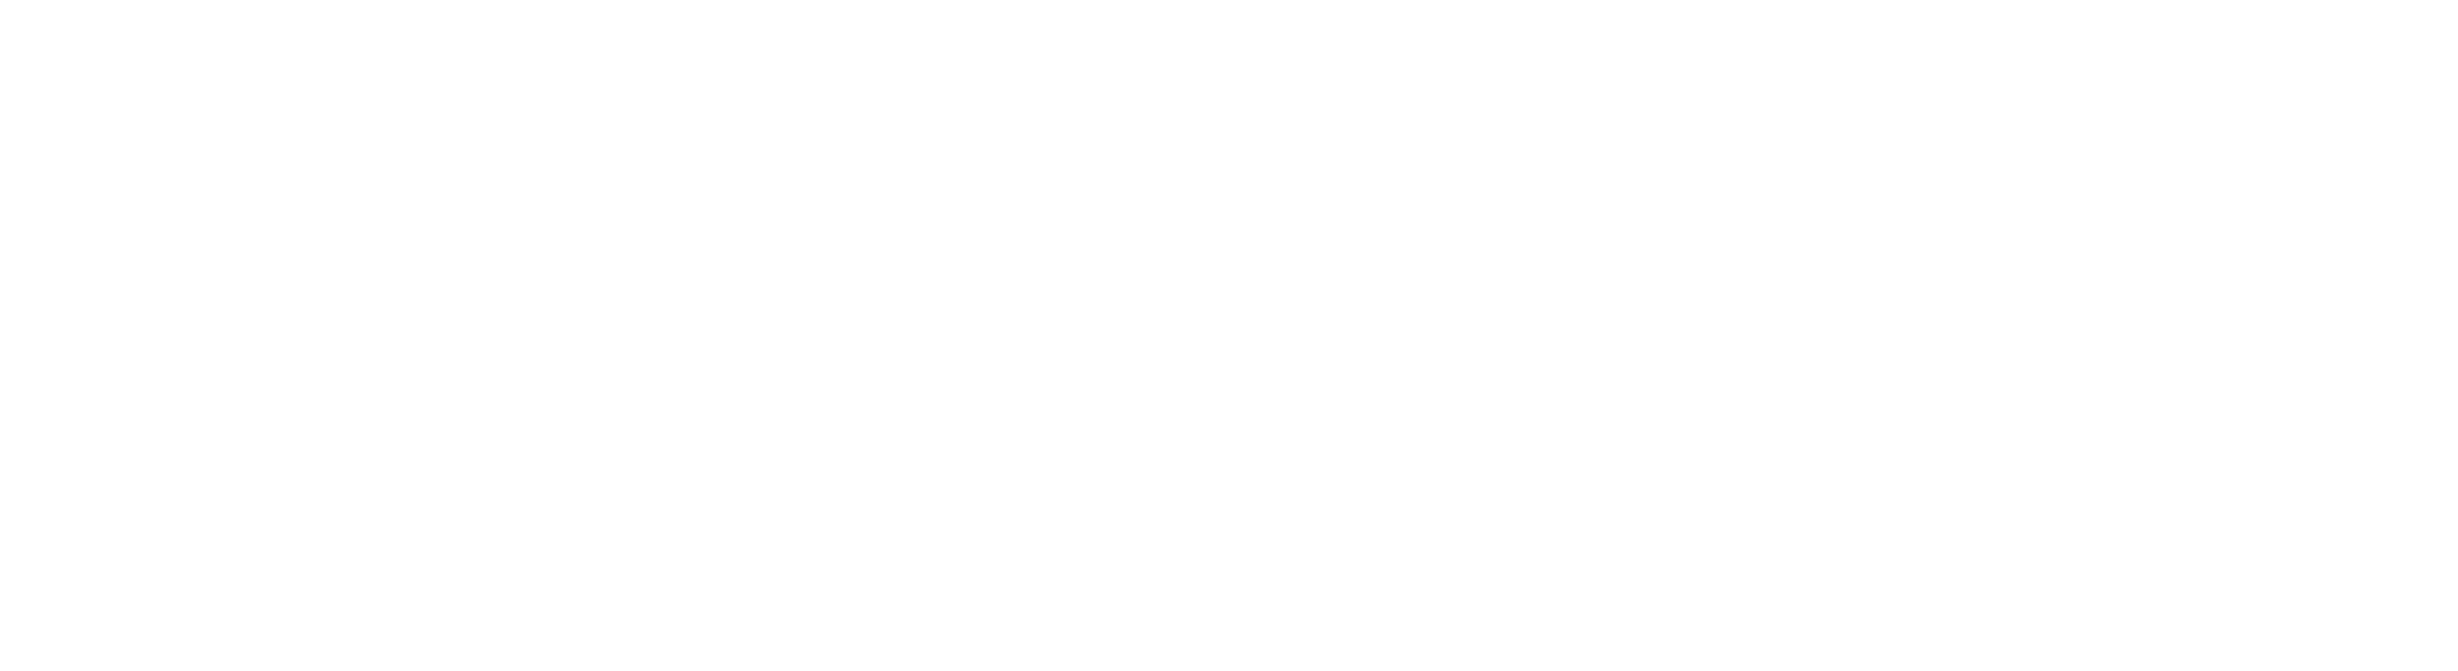


<br>

<br>

<br>

# Artificial Neural Netwrok

In [ ]:
#Imports for ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs)

#Cherokee 2022

In [ ]:
#Check for null values
cherokee2022.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Comment,0
canopy_covered_percent,0
canopy_not_covered_percent,0
Canopy,0
Understory,0
Lonicera japonica,0
Microstegium vimineum,0
Euonymus alatus,0
Ampelopsis brevipedunculata,0
Morus alba,0


In [ ]:
#Remove null values
cherokee2022.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-111-6c8d706c072d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cherokee2022.dropna(inplace=True)


In [ ]:
#Display null values
cherokee2022.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Comment,0
canopy_covered_percent,0
canopy_not_covered_percent,0
Canopy,0
Understory,0
Lonicera japonica,0
Microstegium vimineum,0
Euonymus alatus,0
Ampelopsis brevipedunculata,0
Morus alba,0


In [ ]:
#Cherokee 2022

df = cherokee2022

# Select features (X) related to understory and canopy
X_cherokee2022 = df[['canopy_covered_percent', 'canopy_not_covered_percent', 'canopy_gap_or_downed_trees']]

# Select invasive species columns for target (y)
invasive_cols = ['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus', 'Ampelopsis brevipedunculata',
                 'Morus alba', 'Celastrus orbiculatus', 'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
                 'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii', 'Privet/ Ligustrum', 'Ailanthus']
y_cherokee2022 = df[invasive_cols].applymap(lambda x: 1 if x > 0 else 0)


#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cherokee2022, y_cherokee2022, test_size=0.2, random_state=42)

#Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model.add(Dense(len(invasive_cols), activation='sigmoid'))  # Output layer with neurons equal to the number of invasive species and sigmoid activation

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-113-943bb50363be>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_cherokee2022 = df[invasive_cols].applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0064 - loss: 0.6951  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0221 - loss: 0.6831      
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0315 - loss: 0.6704 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0096 - loss: 0.6581     
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0138 - loss: 0.6455     
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0085 - loss: 0.6284     
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0147 - loss: 0.6188 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0084 - loss: 0.6093     
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0084 - loss: 0.5928     
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0084 - loss: 0.5831     
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0053 - loss: 0.5670     
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


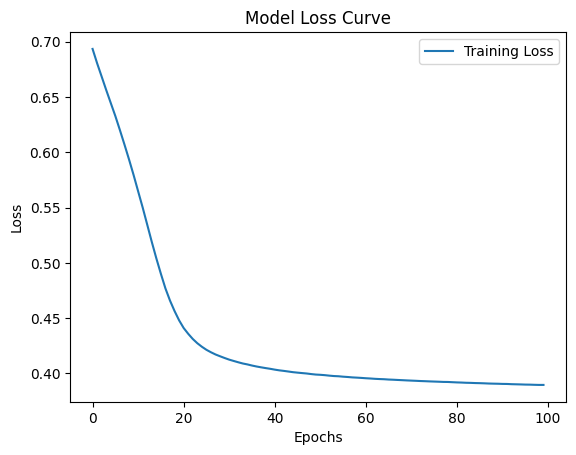

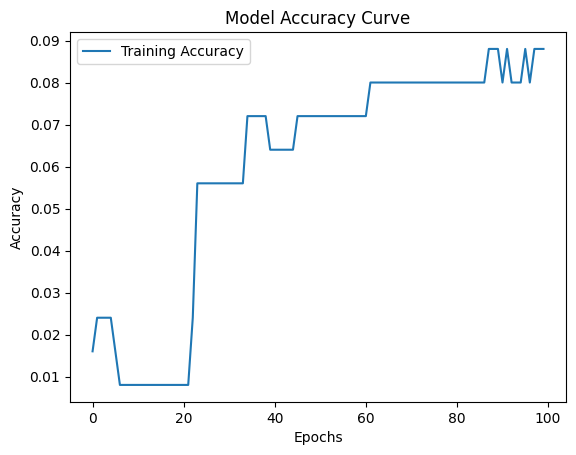

In [ ]:
import matplotlib.pyplot as plt

# Loss curve
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# If classification, plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype(int)  # Threshold for classification
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Visualize confusion matrix for each invasive species
for i, species in enumerate(invasive_cols):
    print(f"Confusion Matrix for {species}:")
    print(confusion_matrices[i])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Confusion Matrix for Lonicera japonica:
[[ 0 10]
 [ 0 22]]
Confusion Matrix for Microstegium vimineum:
[[24  3]
 [ 5  0]]
Confusion Matrix for Euonymus alatus:
[[28  0]
 [ 4  0]]
Confusion Matrix for Ampelopsis brevipedunculata:
[[ 0 15]
 [ 0 17]]
Confusion Matrix for Morus alba:
[[27  0]
 [ 5  0]]
Confusion Matrix for Celastrus orbiculatus:
[[21  0]
 [11  0]]
Confusion Matrix for Vinca minor:
[[28  0]
 [ 4  0]]
Confusion Matrix for Euonymus fortunei:
[[ 1  1]
 [ 0 30]]
Confusion Matrix for Akebia quinata:
[[31  0]
 [ 1  0]]
Confusion Matrix for Fallopia japonica:
[[32  0]
 [ 0  0]]
Confusion Matrix for Achyranthes:
[[17  5]
 [10  0]]
Confusion Matrix for Hederea helix:
[[ 2 13]
 [ 1 16]]
Confusion Matrix for L. maackii:
[[ 0  4]
 [ 0 28]]
Confusion Matrix for Privet/ Ligustrum:
[[28  0]
 [ 4  0]]
Confusion Matrix for Ailanthus:
[[31  0]
 [ 1  0]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


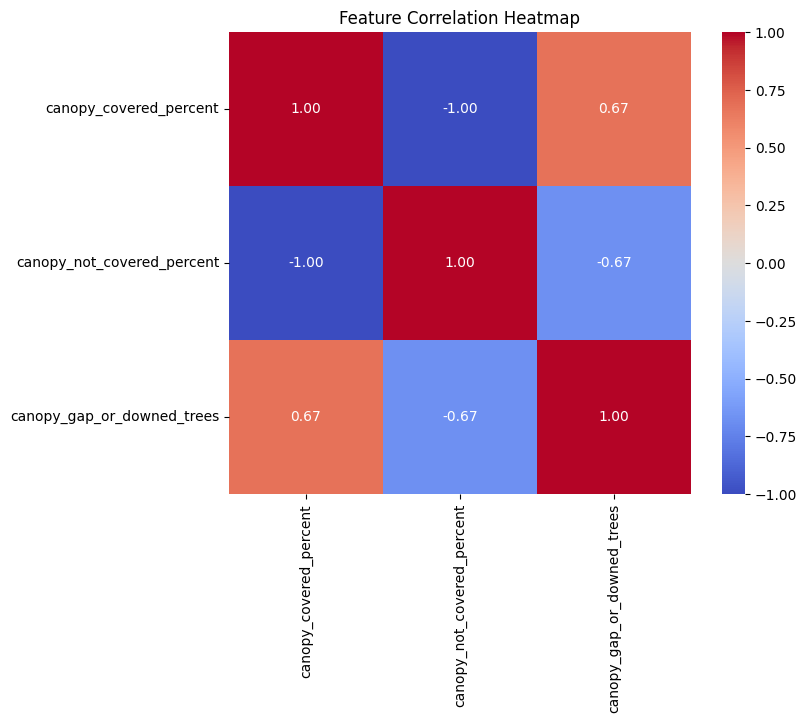

In [ ]:
import seaborn as sns

correlation_matrix = X_cherokee2022.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

##Cherokee 2024

In [ ]:
#Check for null values
cherokee2024.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Comment,0
canopy_covered_percent,2
canopy_not_covered_percent,2
Canopy,26
Understory,26
Lonicera japonica,26
Microstegium vimineum,26
Euonymus alatus,26
Ampelopsis brevipedunculata,26
Morus alba,26


In [ ]:
#Remove null values
cherokee2024.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-120-b614bd951117>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cherokee2024.dropna(inplace=True)


In [ ]:
#Display null values
cherokee2024.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Comment,0
canopy_covered_percent,0
canopy_not_covered_percent,0
Canopy,0
Understory,0
Lonicera japonica,0
Microstegium vimineum,0
Euonymus alatus,0
Ampelopsis brevipedunculata,0
Morus alba,0


In [ ]:
#Cherokee 2024

df = cherokee2024

# Select features (X) related to understory and canopy
X_cherokee2024 = df[['canopy_covered_percent', 'canopy_not_covered_percent', 'canopy_gap_or_downed_trees']]

# Select invasive species columns for target (y)
invasive_cols = ['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus', 'Ampelopsis brevipedunculata',
                 'Morus alba', 'Celastrus orbiculatus', 'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
                 'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii', 'Privet/ Ligustrum', 'Ailanthus']
y_cherokee2024 = df[invasive_cols].applymap(lambda x: 1 if x > 0 else 0)


#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cherokee2024, y_cherokee2024, test_size=0.2, random_state=42)

#Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model.add(Dense(len(invasive_cols), activation='sigmoid'))  # Output layer with neurons equal to the number of invasive species and sigmoid activation

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-122-ead4b2196a65>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_cherokee2024 = df[invasive_cols].applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0173 - loss: 0.7106
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0459 - loss: 0.7028 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1209 - loss: 0.6901 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1473 - loss: 0.6808 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1407 - loss: 0.6738 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1702 - loss: 0.6658 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1299 - loss: 0.6572 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1304 - loss: 0.6496 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0701 - loss: 0.6421     
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0711 - loss: 0.6373 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0303 - loss: 0.6246     
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0381 - loss: 0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


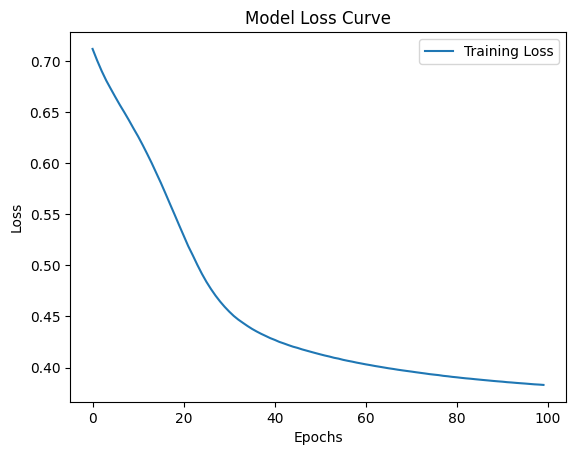

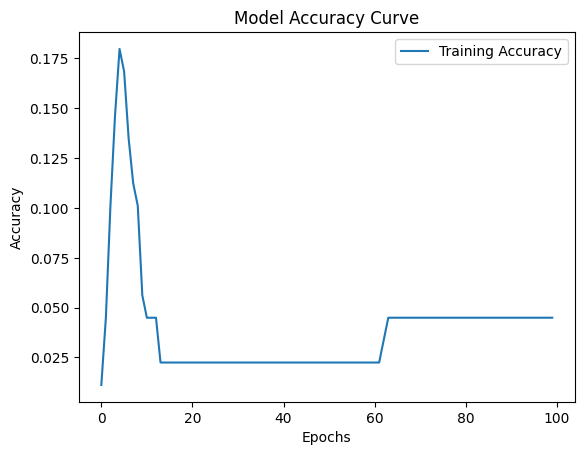

In [ ]:
# Loss curve
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# If classification, plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Threshold for classification
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Visualize confusion matrix for each invasive species
for i, species in enumerate(invasive_cols):
    print(f"Confusion Matrix for {species}:")
    print(confusion_matrices[i])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Confusion Matrix for Lonicera japonica:
[[ 2  8]
 [ 3 10]]
Confusion Matrix for Microstegium vimineum:
[[20  0]
 [ 3  0]]
Confusion Matrix for Euonymus alatus:
[[21  0]
 [ 2  0]]
Confusion Matrix for Ampelopsis brevipedunculata:
[[ 2  6]
 [ 5 10]]
Confusion Matrix for Morus alba:
[[22  0]
 [ 1  0]]
Confusion Matrix for Celastrus orbiculatus:
[[18  0]
 [ 5  0]]
Confusion Matrix for Vinca minor:
[[21  0]
 [ 2  0]]
Confusion Matrix for Euonymus fortunei:
[[ 0  2]
 [ 0 21]]
Confusion Matrix for Akebia quinata:
[[23  0]
 [ 0  0]]
Confusion Matrix for Fallopia japonica:
[[23  0]
 [ 0  0]]
Confusion Matrix for Achyranthes:
[[7 6]
 [3 7]]
Confusion Matrix for Hederea helix:
[[6 7]
 [2 8]]
Confusion Matrix for L. maackii:
[[ 0  1]
 [ 0 22]]
Confusion Matrix for Privet/ Ligustrum:
[[20  0]
 [ 3  0]]
Confusion Matrix for Ailanthus:
[[19  0]
 [ 4  0]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


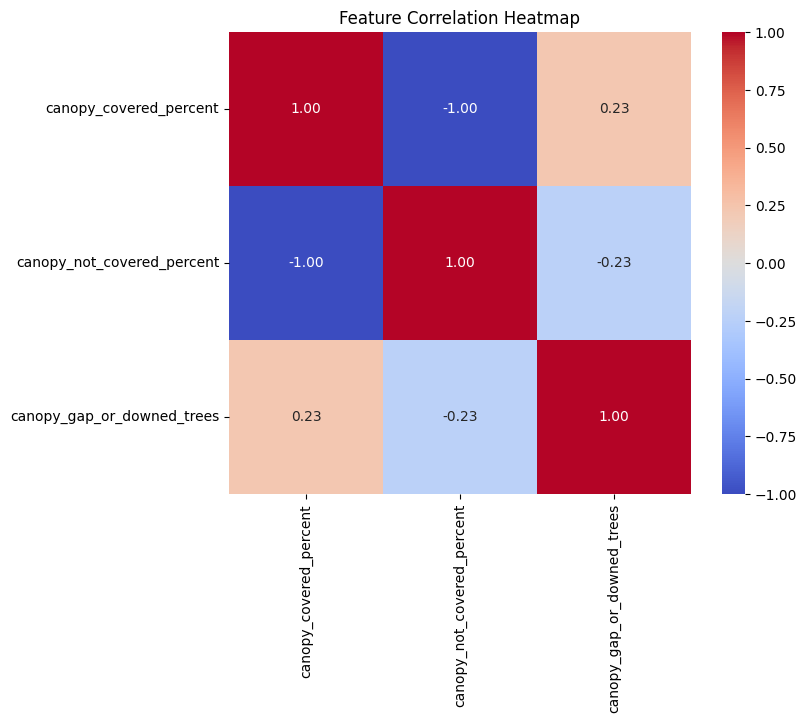

In [ ]:
correlation_matrix = X_cherokee2024.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

##Seneca 2022

In [ ]:
#Check for null values
seneca2022.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Comment,0
canopy_covered_percent,1
canopy_not_covered_percent,1
Canopy,2
Understory,2
Lonicera japonica,0
Microstegium vimineum,0
Euonymus alatus,0
Ampelopsis brevipedunculata,0
Morus alba,0


In [ ]:
#Remove null values
seneca2022.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Check for null values
seneca2022.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Comment,0
canopy_covered_percent,0
canopy_not_covered_percent,0
Canopy,0
Understory,0
Lonicera japonica,0
Microstegium vimineum,0
Euonymus alatus,0
Ampelopsis brevipedunculata,0
Morus alba,0


In [ ]:
#Seneca 2022

df = seneca2022

# Select features (X) related to understory and canopy
X_seneca2022 = df[['canopy_covered_percent', 'canopy_not_covered_percent', 'canopy_gap_or_downed_trees']]

# Select invasive species columns for target (y)
invasive_cols = ['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus', 'Ampelopsis brevipedunculata',
                 'Morus alba', 'Celastrus orbiculatus', 'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
                 'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii', 'Privet/ Ligustrum', 'Ailanthus']
y_seneca2022 = df[invasive_cols].applymap(lambda x: 1 if x > 0 else 0)


#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seneca2022, y_seneca2022, test_size=0.2, random_state=42)

#Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model.add(Dense(len(invasive_cols), activation='sigmoid'))  # Output layer with neurons equal to the number of invasive species and sigmoid activation

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-129-40defe9e464b>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_seneca2022 = df[invasive_cols].applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0312 - loss: 0.6642   
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0312 - loss: 0.6593
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 0.6543
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 0.6493
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 0.6443
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 0.6393
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 0.6343
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 0.6292
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 0.6241
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0000e+00 - loss: 0.6189
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 0.6137
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/ste

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


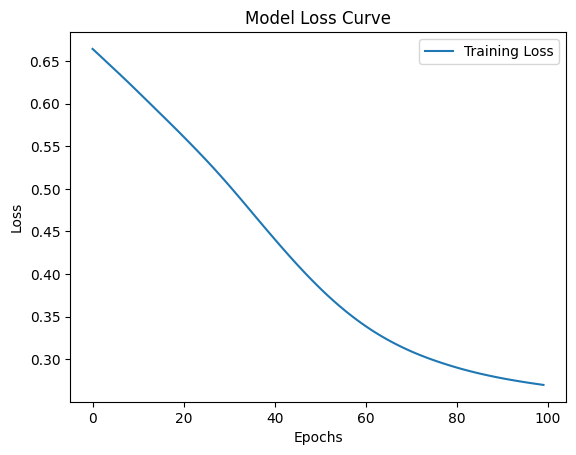

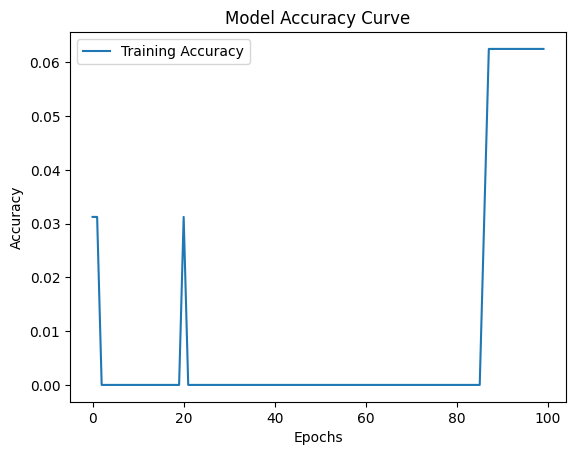

In [ ]:
# Loss curve
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# If classification, plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Threshold for classification
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Visualize confusion matrix for each invasive species
for i, species in enumerate(invasive_cols):
    print(f"Confusion Matrix for {species}:")
    print(confusion_matrices[i])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confusion Matrix for Lonicera japonica:
[[2 0]
 [5 2]]
Confusion Matrix for Microstegium vimineum:
[[8 0]
 [1 0]]
Confusion Matrix for Euonymus alatus:
[[9 0]
 [0 0]]
Confusion Matrix for Ampelopsis brevipedunculata:
[[0 1]
 [0 8]]
Confusion Matrix for Morus alba:
[[4 2]
 [3 0]]
Confusion Matrix for Celastrus orbiculatus:
[[9 0]
 [0 0]]
Confusion Matrix for Vinca minor:
[[9 0]
 [0 0]]
Confusion Matrix for Euonymus fortunei:
[[0 0]
 [0 9]]
Confusion Matrix for Akebia quinata:
[[9 0]
 [0 0]]
Confusion Matrix for Fallopia japonica:
[[9 0]
 [0 0]]
Confusion Matrix for Achyranthes:
[[9 0]
 [0 0]]
Confusion Matrix for Hederea helix:
[[8 0]
 [1 0]]
Confusion Matrix for L. maackii:
[[0 0]
 [0 9]]
Confusion Matrix for Privet/ Ligustrum:
[[8 0]
 [1 0]]
Confusion Matrix for Ailanthus:
[[7 0]
 [2 0]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


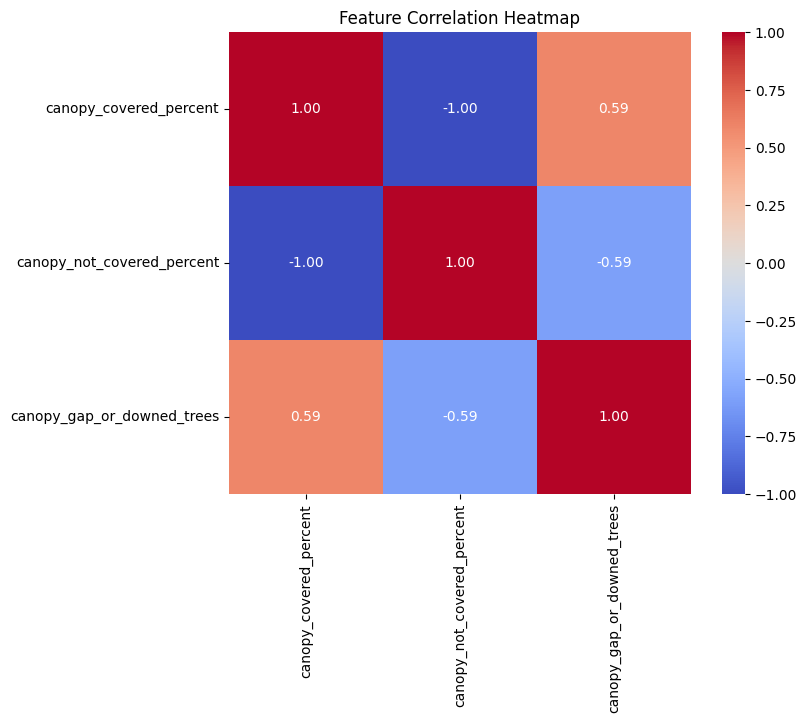

In [ ]:
correlation_matrix = X_seneca2022.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

##Seneca 2024

In [ ]:
#Check for null values
seneca2024.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Comment,0
canopy_covered_percent,0
canopy_not_covered_percent,0
Canopy,2
Understory,2
Lonicera japonica,2
Microstegium vimineum,2
Euonymus alatus,2
Ampelopsis brevipedunculata,2
Morus alba,2


In [ ]:
#Remove null values
seneca2024.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Check for null values
seneca2024.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Comment,0
canopy_covered_percent,0
canopy_not_covered_percent,0
Canopy,0
Understory,0
Lonicera japonica,0
Microstegium vimineum,0
Euonymus alatus,0
Ampelopsis brevipedunculata,0
Morus alba,0


In [ ]:
#Seneca 2024

df = seneca2024

# Select features (X) related to understory and canopy
X_seneca2024 = df[['canopy_covered_percent', 'canopy_not_covered_percent', 'canopy_gap_or_downed_trees']]

# Select invasive species columns for target (y)
invasive_cols = ['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus', 'Ampelopsis brevipedunculata',
                 'Morus alba', 'Celastrus orbiculatus', 'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
                 'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii', 'Privet/ Ligustrum', 'Ailanthus']
y_seneca2024 = df[invasive_cols].applymap(lambda x: 1 if x > 0 else 0)


#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seneca2024, y_seneca2024, test_size=0.2, random_state=42)

#Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model.add(Dense(len(invasive_cols), activation='sigmoid'))  # Output layer with neurons equal to the number of invasive species and sigmoid activation

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-136-be72e606059a>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_seneca2024 = df[invasive_cols].applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0000e+00 - loss: 0.7028
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.6951 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.6888
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.6821 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.6761 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.6697 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.6635 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.6576 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.6518 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.6462 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.6403 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


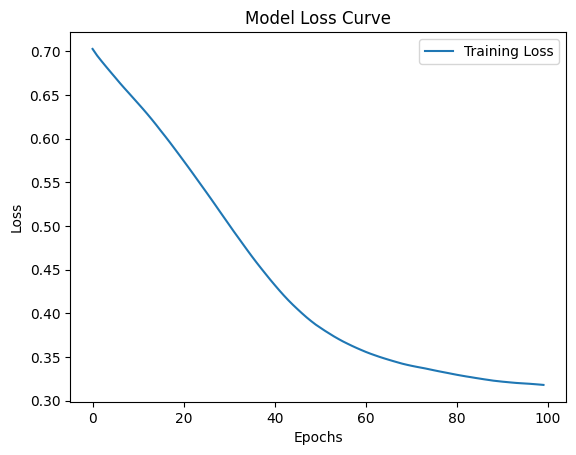

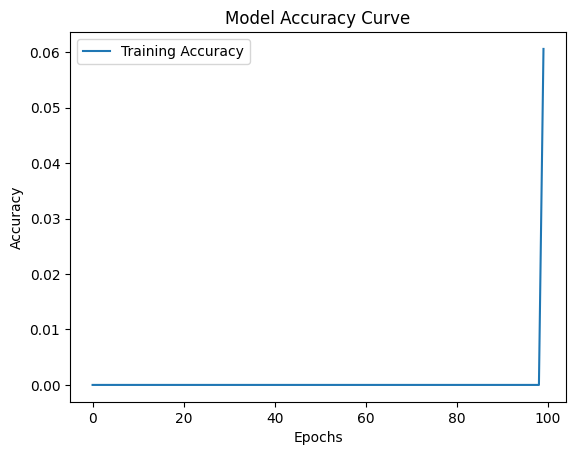

In [ ]:
# Loss curve
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# If classification, plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Threshold for classification
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Visualize confusion matrix for each invasive species
for i, species in enumerate(invasive_cols):
    print(f"Confusion Matrix for {species}:")
    print(confusion_matrices[i])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Confusion Matrix for Lonicera japonica:
[[7 2]
 [0 0]]
Confusion Matrix for Microstegium vimineum:
[[8 0]
 [1 0]]
Confusion Matrix for Euonymus alatus:
[[6 0]
 [3 0]]
Confusion Matrix for Ampelopsis brevipedunculata:
[[0 0]
 [0 9]]
Confusion Matrix for Morus alba:
[[4 2]
 [2 1]]
Confusion Matrix for Celastrus orbiculatus:
[[9 0]
 [0 0]]
Confusion Matrix for Vinca minor:
[[9 0]
 [0 0]]
Confusion Matrix for Euonymus fortunei:
[[0 1]
 [0 8]]
Confusion Matrix for Akebia quinata:
[[9 0]
 [0 0]]
Confusion Matrix for Fallopia japonica:
[[9 0]
 [0 0]]
Confusion Matrix for Achyranthes:
[[2 5]
 [1 1]]
Confusion Matrix for Hederea helix:
[[9 0]
 [0 0]]
Confusion Matrix for L. maackii:
[[0 1]
 [0 8]]
Confusion Matrix for Privet/ Ligustrum:
[[8 0]
 [1 0]]
Confusion Matrix for Ailanthus:
[[6 0]
 [3 0]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


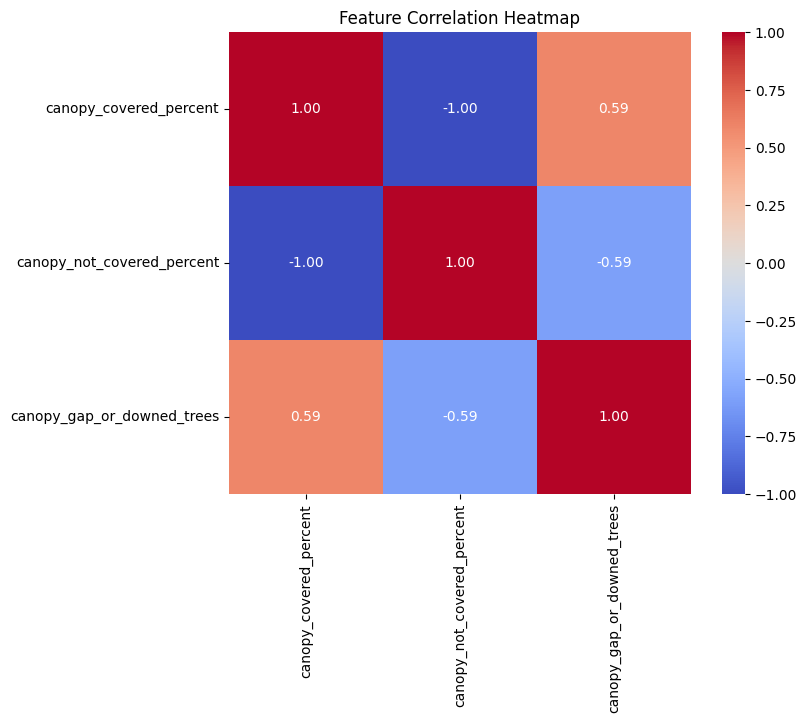

In [ ]:
correlation_matrix = X_seneca2022.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

##ANN Findings

* There is constant inaccurate predicting amongst all 4 datasets
* Accuraccy is very low even with a high amount of epochs.  This is likely due to the limited amount of data in each set
* ANN is not a viable model for the limited amount of data

##Conclusion

###Associative Rule Learning
While the analysis primarily revealed patterns of plant species co-occurrence, including frequent associations between canopy, understory, and invasive species, it did not directly establish the impact of canopy cover or gaps on invasive species presence. However, moderate positive correlations observed between certain invasive species and canopy gaps/downed trees, such as Ampelopsis brevipedunculata, suggest a potential link that warrants further investigation. Further analysis using regression or other modeling techniques with canopy features as predictors could help quantify their influence and uncover potential causal relationships.

###ANN
The ANN models, trained to predict the presence of invasive species based on canopy features (covered percentage, not covered percentage, and presence of gaps/downed trees), demonstrated moderate predictive accuracy, suggesting that canopy characteristics can provide valuable information for understanding and anticipating the likelihood of invasive species presence. However, the models were trained on a relatively small dataset, limiting the ability to draw definitive conclusions. Further analysis of feature importance and model interpretation, along with potentially gathering more data, is necessary to determine the specific influence of each canopy feature and refine the models' predictive capabilities for practical applications.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
